<a href="https://colab.research.google.com/github/harshparmarr/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - NETFLIX MOVIES AND TV SHOWS CLUSTERING






##### **Project Type**    - EDA/Clustering/Classification/Unsupervised
##### **Contribution**    - Team
##### **NAME -** Harsh Parmar

# **Project Summary -**

**Objective:**
The goal of this project is to perform exploratory data analysis (EDA) and clustering on a dataset containing information about TV shows and movies available on Netflix as of 2019. The dataset, obtained from Flixable, includes 7787 rows and 12 columns. The primary objectives are to gain insights into the content distribution, understand the availability of content in different countries, analyze trends in Netflix's focus on TV shows versus movies, and cluster similar content based on text-based features.
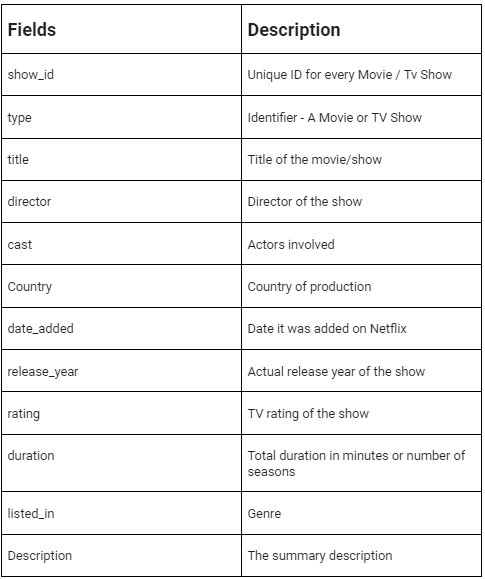

**Key Steps:**

1. **Data Exploration:**
   - Conduct EDA to understand the structure and characteristics of the dataset.
   - Explore basic statistics, identify missing values, and handle outliers.
   - Visualize the distribution of content types, genres, and other relevant features.

2. **Content Availability Across Countries:**
   - Analyze the dataset to identify the distribution of TV shows and movies across different countries.
   - Determine which countries have the highest and lowest numbers of available titles.

3. **Temporal Analysis of Content:**
   - Examine trends in the number of TV shows and movies on Netflix over the years.

4. **Clustering Similar Content:**
   - Apply clustering algorithms (e.g., K-means) to group similar content based on extracted features.
   - Determine optimal cluster numbers and evaluate the quality of clusters.

**Potential Findings:**
   - Identification of clusters with similar content characteristics.
   - Trends in Netflix's content focus over the years.

This project aims to uncover valuable insights into the Netflix content landscape through exploratory data analysis and clustering. By analyzing content availability, temporal trends, and performing clustering , the project seeks to provide a comprehensive understanding of the diverse content library on Netflix. Integration with external datasets enhances the depth of analysis and provides a foundation for future research in content recommendation systems or strategic content planning.

# **GitHub Link -**

https://github.com/vipul-solanki/Netflix-clustering

# **Problem Statement**


**Problem Statement:**

We have a dataset of TV shows and movies on Netflix. The goal is to:

1. Understand the data.
2. Doing exploratory data analysis.
3. Aim to clustering the similar content for the data.

By solving these challenges, we aim to gain insights into viewer preferences, content trends, and the global landscape of Netflix offerings.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### Dataset Loading

In [ ]:
# Mount drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
path="/content/drive/MyDrive/Almabetter/Project/Module 6/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv"
df=pd.read_csv(path)

### Dataset First View

In [ ]:
# Dataset First Look
df.head(5)

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...





























### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f"The dataset have {df.shape[0]} rows and {df.shape[1]} columns")

The dataset have 7787 rows and 12 columns


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


We can see from info that only release_year have int datatype while others object datatype. There are some null values in some features. We will handle that later.

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

There is no duplicate value in the dataset.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

There are missing values in columns (director, cast, country, date_added, rating)

Text(0.5, 1.0, 'Missing value in dataset.')

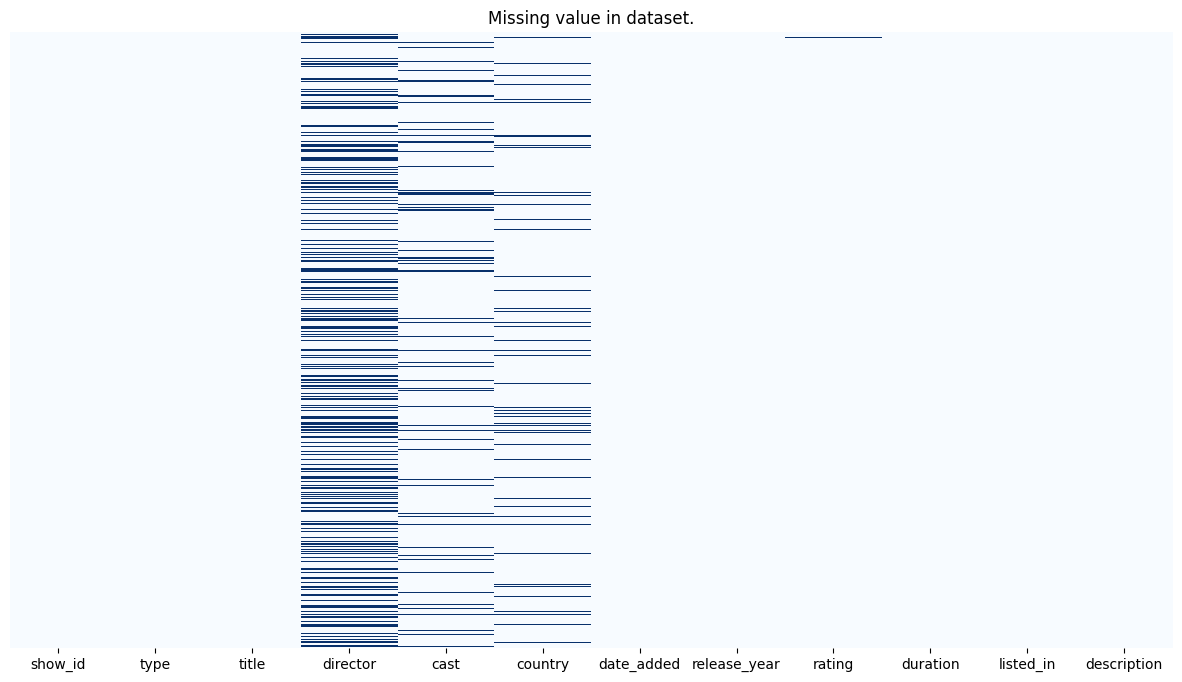

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='Blues')
plt.title("Missing value in dataset.")

In [ ]:
# Imputation of missing values.

# Fill missing values for 'director', 'cast', and 'country' with 'Unknown'
df[['director', 'cast', 'country']] = df[['director', 'cast', 'country']].fillna('Unknown')

# For 'date_added' and 'rating', fill missing values with the mode (the most common value)
for column in ['date_added', 'rating']:
    mode_value = df[column].mode()[0]
    df[column] = df[column].fillna(mode_value)

# Display the changes.
print('Missing values filled for director, cast, and country with unknown.')
print('Missing values for date_added and rating filled with the mode.')

Missing values filled for director, cast, and country with unknown.
Missing values for date_added and rating filled with the mode.


### What did you know about your dataset?

There are total 12 features in the data in which most of them are categorical features.

The notebook contain the first view of our data. Data are given with various features like director, country, cast etc. Dataset have enough amount of feature on which we can do clustering.

We also handle the missing values in our data.

The missing values of feature (director , cast, country) replace with unknown. The missing values of feature (date_added, rating) replaced with mode.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:


# Dataset Describe
df.describe()

release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000

### Variables Description

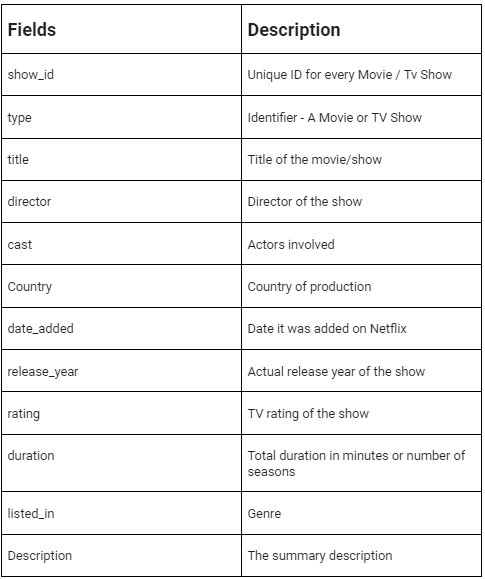

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
categorical_cols=[i for i in df.columns if df[i].dtypes=='O']
categorical_cols.remove('duration')
categorical_cols.remove('cast')
categorical_cols.remove('listed_in')
categorical_cols.remove('description')
categorical_cols.remove('country')

for col in categorical_cols:
  print(f'Unique values in column {col} are:, {(df[col].unique())}')

Unique values in column show_id are:, ['s1' 's2' 's3' ... 's7785' 's7786' 's7787']
Unique values in column type are:, ['TV Show' 'Movie']
Unique values in column title are:, ['3%' '7:19' '23:59' ... 'Zulu Man in Japan' "Zumbo's Just Desserts"
 "ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS"]
Unique values in column director are:, ['Unknown' 'Jorge Michel Grau' 'Gilbert Chan' ... 'Josef Fares'
 'Mozez Singh' 'Sam Dunn']
Unique values in column date_added are:, ['August 14, 2020' 'December 23, 2016' 'December 20, 2018' ...
 'December 6, 2018' 'March 9, 2016' 'January 11, 2020']
Unique values in column rating are:, ['TV-MA' 'R' 'PG-13' 'TV-14' 'TV-PG' 'NR' 'TV-G' 'TV-Y' 'TV-Y7' 'PG' 'G'
 'NC-17' 'TV-Y7-FV' 'UR']


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Separate the 'duration' data for movies and TV shows
# Create a new column 'duration_min' for movie durations in minutes
# Create a new column 'duration_seasons' for TV show durations in seasons

# Extract movie durations in minutes
movie_durations = df[df['duration'].str.contains('min', na=False)]['duration']
df['duration_min'] = movie_durations.str.extract('(\\d+)').astype(float)

# Extract TV shows durations in seasons
unique_tv_show_durations = df[df['duration'].str.contains('Season', na=False)]['duration'].unique()
df['duration_seasons'] = df['duration'].str.extract('(\d+) Season').astype(float)

# Display the head of the updated dataframe to confirm the changes
print(df[['duration', 'duration_min', 'duration_seasons']].head(10))


    duration  duration_min  duration_seasons
0  4 Seasons           NaN               4.0
1     93 min          93.0               NaN
2     78 min          78.0               NaN
3     80 min          80.0               NaN
4    123 min         123.0               NaN
5   1 Season           NaN               1.0
6     95 min          95.0               NaN
7    119 min         119.0               NaN
8    118 min         118.0               NaN
9    143 min         143.0               NaN


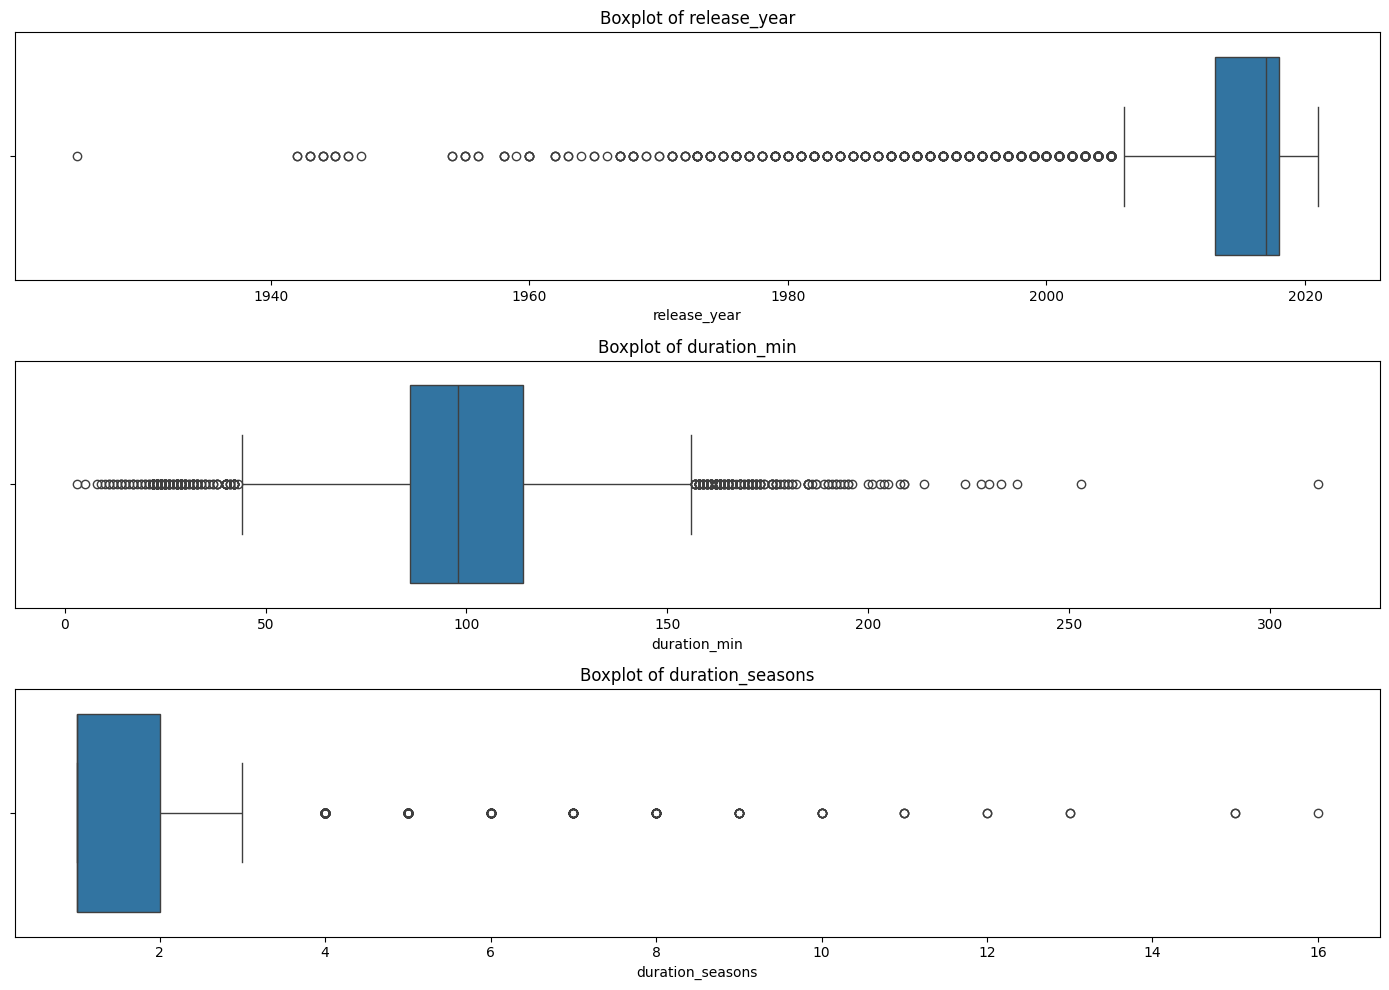

In [ ]:
# Create boxplots for all numerical columns to identify outliers
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(14, 10))
for i, column in enumerate(numerical_columns):
    plt.subplot(3, 1, i+1)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

### What all manipulations have you done and insights you found?


- Make two separate features for movies duration in minute and tv shows duration in number of seasons.
- Replace the missing values with appropriate values.
- We check for outliers. We have to clustering later. So handling accordingly.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1
# Univariate visualization for 'type'

Text(0.5, 1.0, 'Count of TV Shows and Movies')

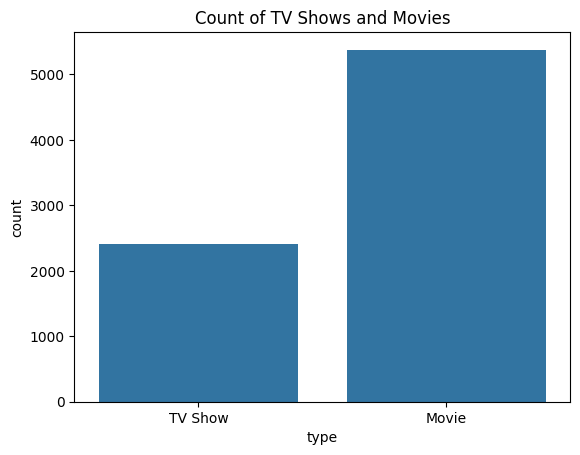

In [ ]:
# Chart - 1 visualization code
# Univariate visualization for 'type'
sns.countplot(x='type', data=df)
plt.title('Count of TV Shows and Movies')

##### 1. Why did you pick the specific chart?

Column chart is best fit to vizualise the distribution of movies and TV shows.

##### 2. What is/are the insight(s) found from the chart?

There are around 2500 TV shows while around 5500 movies in the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The dataset have decent amount of movies listed on netflix. Netflix should list more number of TV shows on their platform.

#### Chart - 2
# Univariate visualization for 'rating'

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'TV-MA'),
  Text(1, 0, 'TV-14'),
  Text(2, 0, 'TV-PG'),
  Text(3, 0, 'TV-Y7'),
  Text(4, 0, 'TV-Y'),
  Text(5, 0, 'TV-G'),
  Text(6, 0, 'NR'),
  Text(7, 0, 'R'),
  Text(8, 0, 'TV-Y7-FV')])

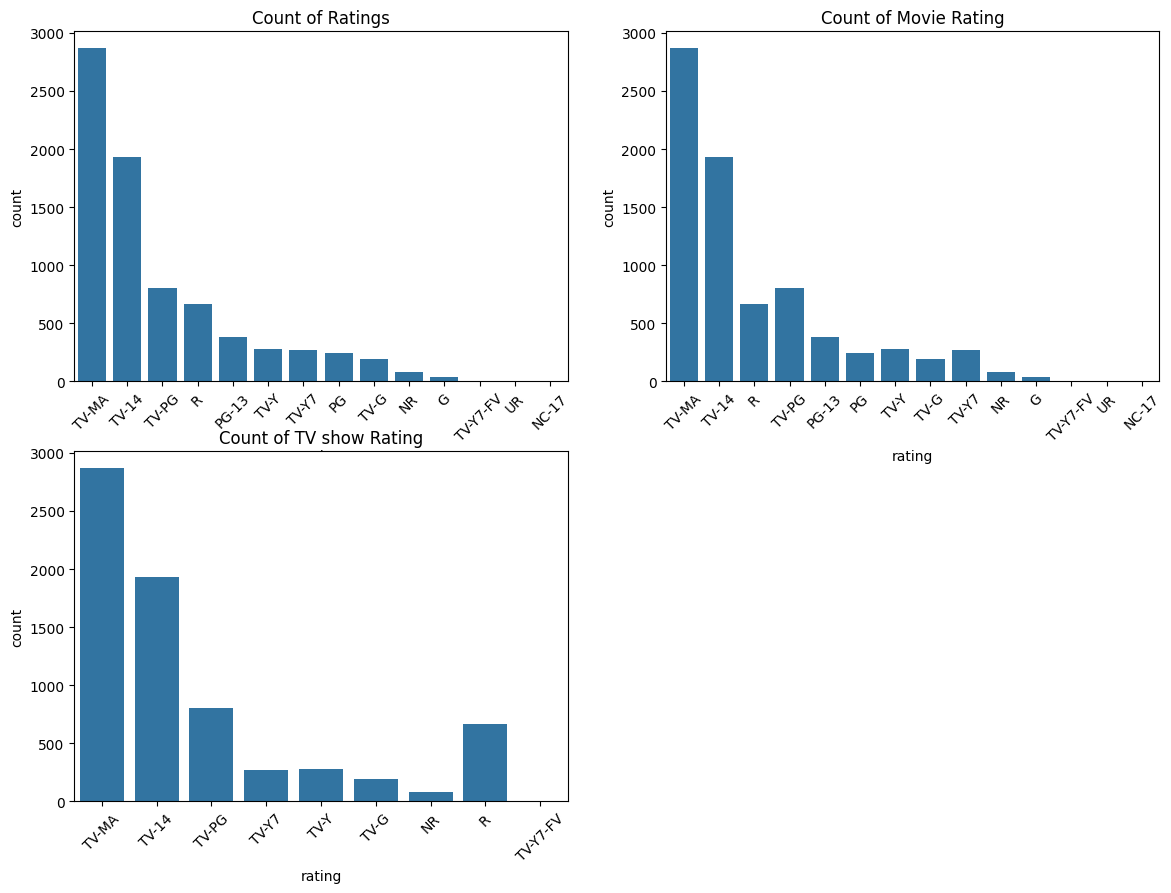

In [ ]:
# Chart - 2 visualization code

# Create univariate visualizations for selected columns
plt.figure(figsize=(14, 10))

# Univariate visualization for 'rating'
plt.subplot(2, 2, 1)
sns.countplot(x='rating', data=df, order = df['rating'].value_counts().index)
plt.title('Count of Ratings')
plt.xticks(rotation=45)

# Seperate univariate visualization for Movies Rating and TV shows rating
# Movie Rating
plt.subplot(2, 2, 2)
sns.countplot(x='rating', data=df, order = df[df['type'] == 'Movie']['rating'].value_counts().index)
plt.title('Count of Movie Rating')
plt.xticks(rotation=45)

# TV shows rating
plt.subplot(2, 2, 3)
sns.countplot(x='rating', data=df, order = df[df['type'] == 'TV Show']['rating'].value_counts().index)
plt.title('Count of TV show Rating')
plt.xticks(rotation=45)

##### 1. Why did you pick the specific chart?

Column chart is best fit to show the distribution of rating over movies and TV shows.

##### 2. What is/are the insight(s) found from the chart?

The ratings TV-ma and TV-14 is most occuring in both movies and TV shows.

The ratings NR and TV-Y7-FV is least occuring in TV shows.

The ratings UR and NC-17 is least occuring in movies

We can see different chart for combined and seperate distribution for rating.

#### Chart - 3
# Univariate visualization for 'country'

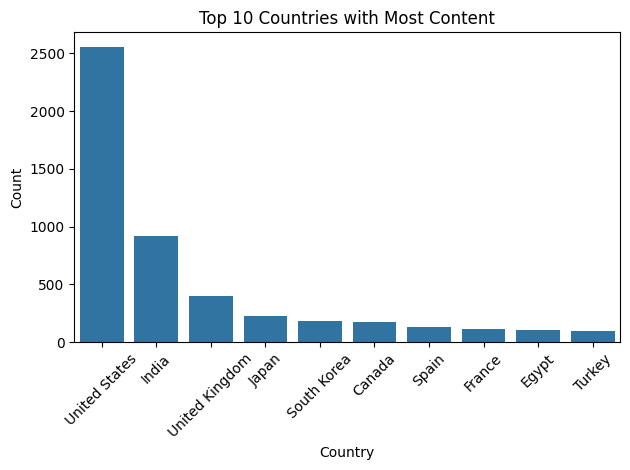

In [ ]:
# Chart - 3 visualization code

# Filter the df from Unknown countries
excluded_country = "Unknown"
filtered_df_country = df.query("country != @excluded_country")

# Univariate visualization for 'country'
country_counts = filtered_df_country['country'].value_counts().head(10)
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title('Top 10 Countries with Most Content')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Column chart is best fit to show the distribution of countries.

##### 2. What is/are the insight(s) found from the chart?

Most of movies and TV shows is listed from the countries USA and India.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Netflix should also focus on contents from differents countries.

#### Chart - 4
# Univarite analysis for 'Title'

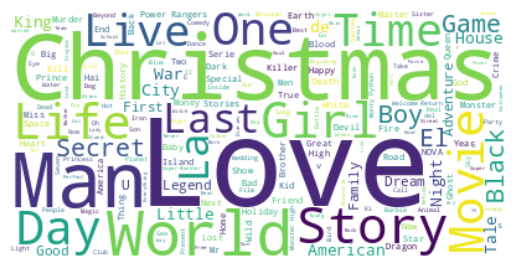

In [ ]:

#subsetting df
df_word_cloud = df['title']
text = " ".join(word for word in df_word_cloud)
# Create stopword list:
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##### 1. Why did you pick the specific chart?

Word cloud is best to see the most frequent words in title.

##### 2. What is/are the insight(s) found from the chart?

The word that most frequently used in title are love, christmas, world, etc.

#### Chart - 5
# Univarite analysis for "Directors".

In [ ]:
df.director

0                 Unknown
1       Jorge Michel Grau
2            Gilbert Chan
3             Shane Acker
4          Robert Luketic
              ...        
7782          Josef Fares
7783          Mozez Singh
7784              Unknown
7785              Unknown
7786             Sam Dunn
Name: director, Length: 7787, dtype: object

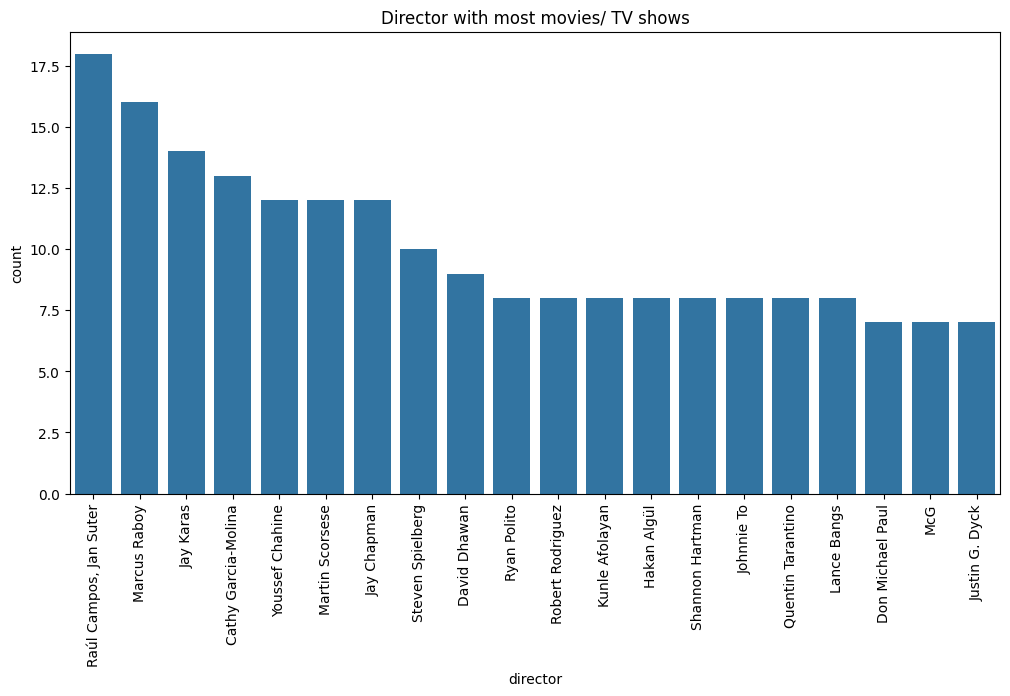

In [ ]:
# Filter the df from Unknown directors
excluded_director = "Unknown"
filtered_df = df.query("director != @excluded_director")

# Create the countplot with the filtered DataFrame
plt.figure(figsize=(12, 6))
sns.countplot(x='director', data=filtered_df, order=filtered_df['director'].value_counts().head(20).index)
plt.title('Director with most movies/ TV shows')
plt.xticks(rotation=90)
plt.show()


##### 1. Why did you pick the specific chart?

Column chart is good to visualise. The number of movies/Tv shows produced by the directors.

##### 2. What is/are the insight(s) found from the chart?

The directors with most number of TV shows/movies are "Raul Campos,Jan Suter", "Marcus Raboy".

#### Chart - 6
# Univarite analysis for "Cast".

In [ ]:

#function to get dict of actors from df['cast'].
def convert_to_list(df):
  cast_count = {}
  cast_count_final = []
  cast_list = list(df['cast'])
  for each in range(len(cast_list)):
    cast_count_final.extend(str(cast_list[each]).split(","))
  for each in cast_count_final:
    if each not in cast_count:
      cast_count[each] = cast_count_final.count(each)
  return cast_count

In [ ]:
#dataframe for cast v/s count
cast_df = convert_to_list(df)
casts_df = pd.DataFrame.from_dict(cast_df, orient='index', columns=['count'])


In [ ]:
#highest number movie for actors
casts_df.sort_values('count', ascending=False).drop("Unknown")

count
 Anupam Kher           38
 Takahiro Sakurai      28
Shah Rukh Khan         27
 Om Puri               27
 Boman Irani           25
...                   ...
 Juan Manuel Diaz       1
 Ana Wills              1
 Mauricio Figueroa      1
 Matias Maldonado       1
 Rachel Khoo            1

[35372 rows x 1 columns]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, ' Anupam Kher'),
  Text(1, 0, ' Takahiro Sakurai'),
  Text(2, 0, 'Shah Rukh Khan'),
  Text(3, 0, ' Om Puri'),
  Text(4, 0, ' Boman Irani'),
  Text(5, 0, ' Andrea Libman'),
  Text(6, 0, ' Paresh Rawal'),
  Text(7, 0, ' Yuki Kaji'),
  Text(8, 0, ' Vincent Tong'),
  Text(9, 0, 'Akshay Kumar'),
  Text(10, 0, ' Kareena Kapoor'),
  Text(11, 0, ' John Cleese'),
  Text(12, 0, 'Adam Sandler'),
  Text(13, 0, ' Naseeruddin Shah'),
  Text(14, 0, ' Ai Kayano'),
  Text(15, 0, ' Yashpal Sharma'),
  Text(16, 0, 'Amitabh Bachchan'),
  Text(17, 0, ' Junichi Suwabe'),
  Text(18, 0, ' Gulshan Grover'),
  Text(19, 0, 'David Attenborough')])

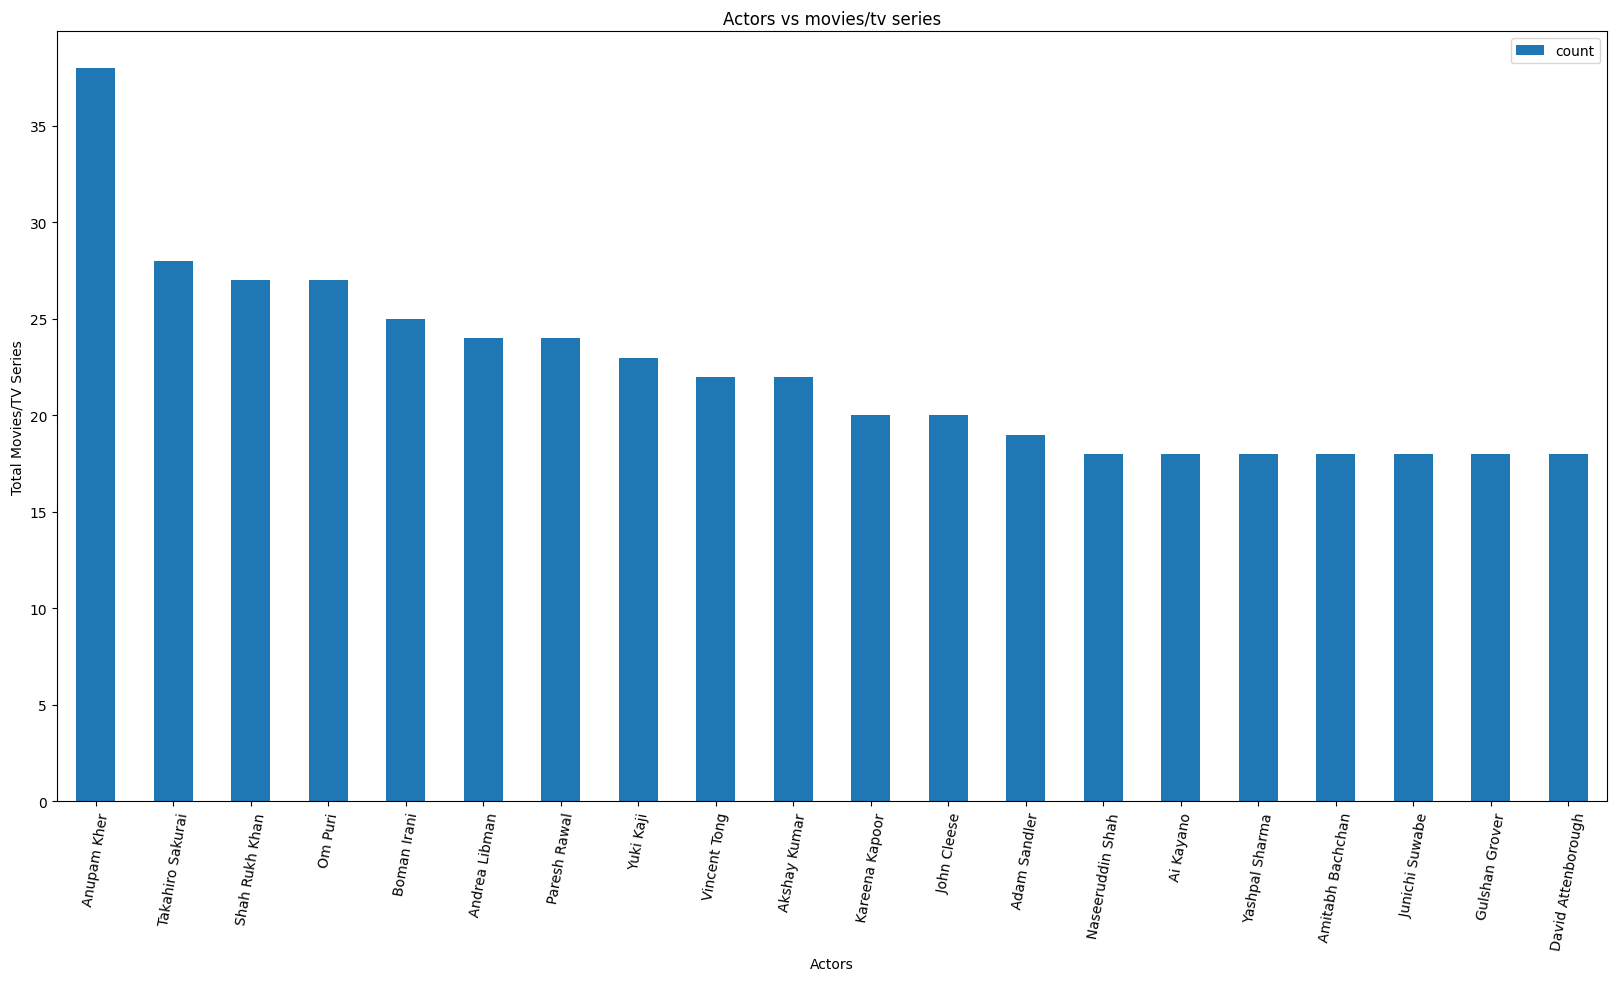

In [ ]:
# plot for top actors and count
plt.rcParams["figure.figsize"] = (20, 10)
casts_df.sort_values('count', ascending=False).drop('Unknown').head(20).plot(kind='bar')
plt.xlabel("Actors")
plt.ylabel("Total Movies/TV Series")
plt.title("Actors vs movies/tv series")
plt.xticks(rotation=80)

##### 1. Why did you pick the specific chart?

X axis shows the cast name where as the y-axis shows the number of movies and tv show they worked in. The column chart is good to visualize that.

##### 2. What is/are the insight(s) found from the chart?

The most famous or performed actors in movies and tv shows are Anupam Kher,Takahiro sakurai, Shah Rukh Khan.

#### Chart - 7
# Univarite analysis for "duration".

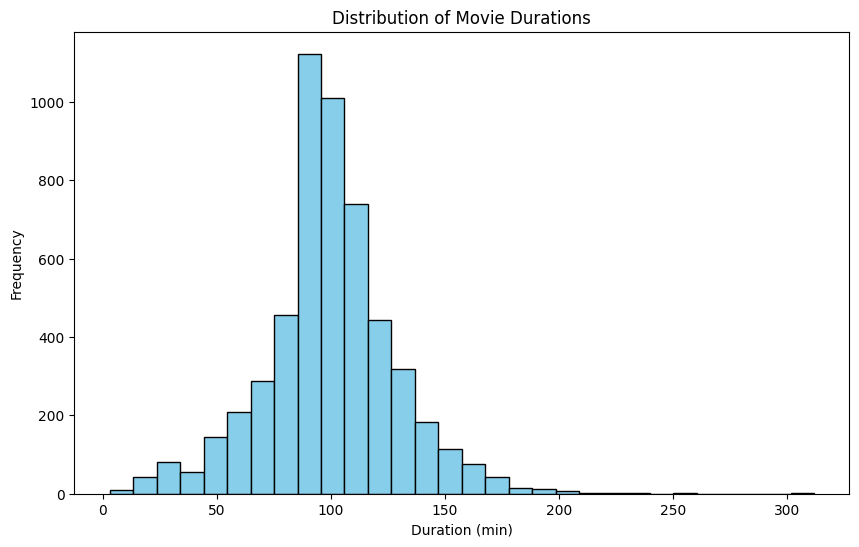

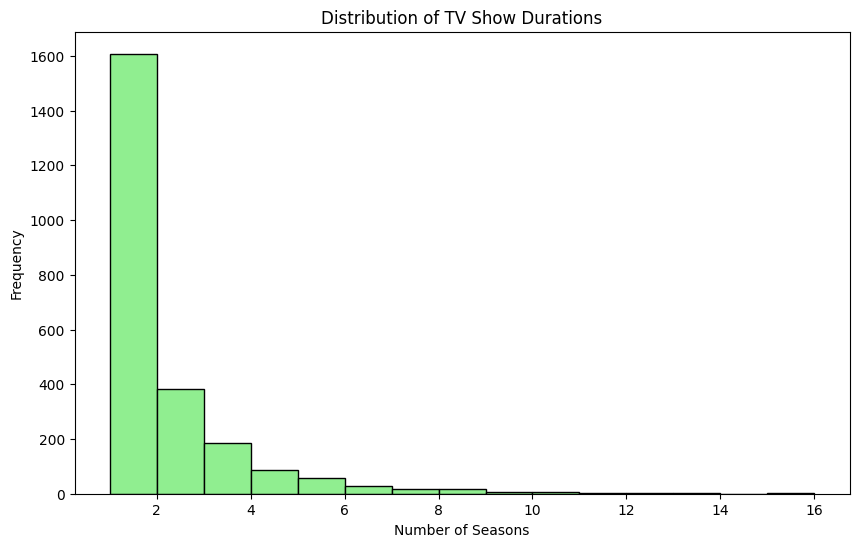

Average movie duration 99.30797842663195 min
Average TV shows seasons 1.7759336099585061 seasons


In [ ]:
# Chart - 4 visualization code

# Univarite analysis for "duration".
# We can also visualize the distribution of durations using histograms

# Calculate the average duration for movies and TV shows
average_movie_duration = df['duration_min'].mean()
average_tv_show_duration = df['duration_seasons'].mean()

# Visualize the distribution of movie durations
plt.figure(figsize=(10, 6))
plt.hist(df['duration_min'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (min)')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of TV show durations
plt.figure(figsize=(10, 6))
plt.hist(df['duration_seasons'].dropna(), bins=15, color='lightgreen', edgecolor='black')
plt.title('Distribution of TV Show Durations')
plt.xlabel('Number of Seasons')
plt.ylabel('Frequency')
plt.show()

# Display the average durations
print(f"Average movie duration {average_movie_duration} min")
print(f"Average TV shows seasons {average_tv_show_duration} seasons")

##### 1. Why did you pick the specific chart?

Histogram is best to visualize the distribution of one numerical variable.

Here, In first histogram shows the distribution of duration(min) of movies.
In second histogram shows the distribution of seasons of TV shows.

##### 2. What is/are the insight(s) found from the chart?

First histogarm, the distribution of duration of is quite normal distribution. The mean of that distribution is around 100 minutes.

Second histogram, the distribution od duration of TV shows tiled over left side and the mean of that is around 1-2 seasons.

#### Chart - 8
# Univarite analysis for "Listed in".

In [ ]:
#listed in to list
def convert_to_list(df):
  genre_count = {}
  genre_count_final = []
  genre_list = list(df['listed_in'])
  for each in range(len(genre_list)):
    genre_count_final.extend(genre_list[each].split(", "))
  for each in genre_count_final:
    if each not in genre_count:
      genre_count[each] = genre_count_final.count(each)
  return genre_count

In [ ]:
#make genre df
genre_dict = convert_to_list(df)
genre_df = pd.DataFrame.from_dict(genre_dict, orient='index', columns=['count']).sort_values('count', ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'International Movies'),
  Text(1, 0, 'Dramas'),
  Text(2, 0, 'Comedies'),
  Text(3, 0, 'International TV Shows'),
  Text(4, 0, 'Documentaries'),
  Text(5, 0, 'Action & Adventure'),
  Text(6, 0, 'TV Dramas'),
  Text(7, 0, 'Independent Movies'),
  Text(8, 0, 'Children & Family Movies'),
  Text(9, 0, 'Romantic Movies'),
  Text(10, 0, 'TV Comedies'),
  Text(11, 0, 'Thrillers'),
  Text(12, 0, 'Crime TV Shows'),
  Text(13, 0, "Kids' TV"),
  Text(14, 0, 'Docuseries'),
  Text(15, 0, 'Romantic TV Shows'),
  Text(16, 0, 'Stand-Up Comedy'),
  Text(17, 0, 'Music & Musicals'),
  Text(18, 0, 'Horror Movies'),
  Text(19, 0, 'British TV Shows')])

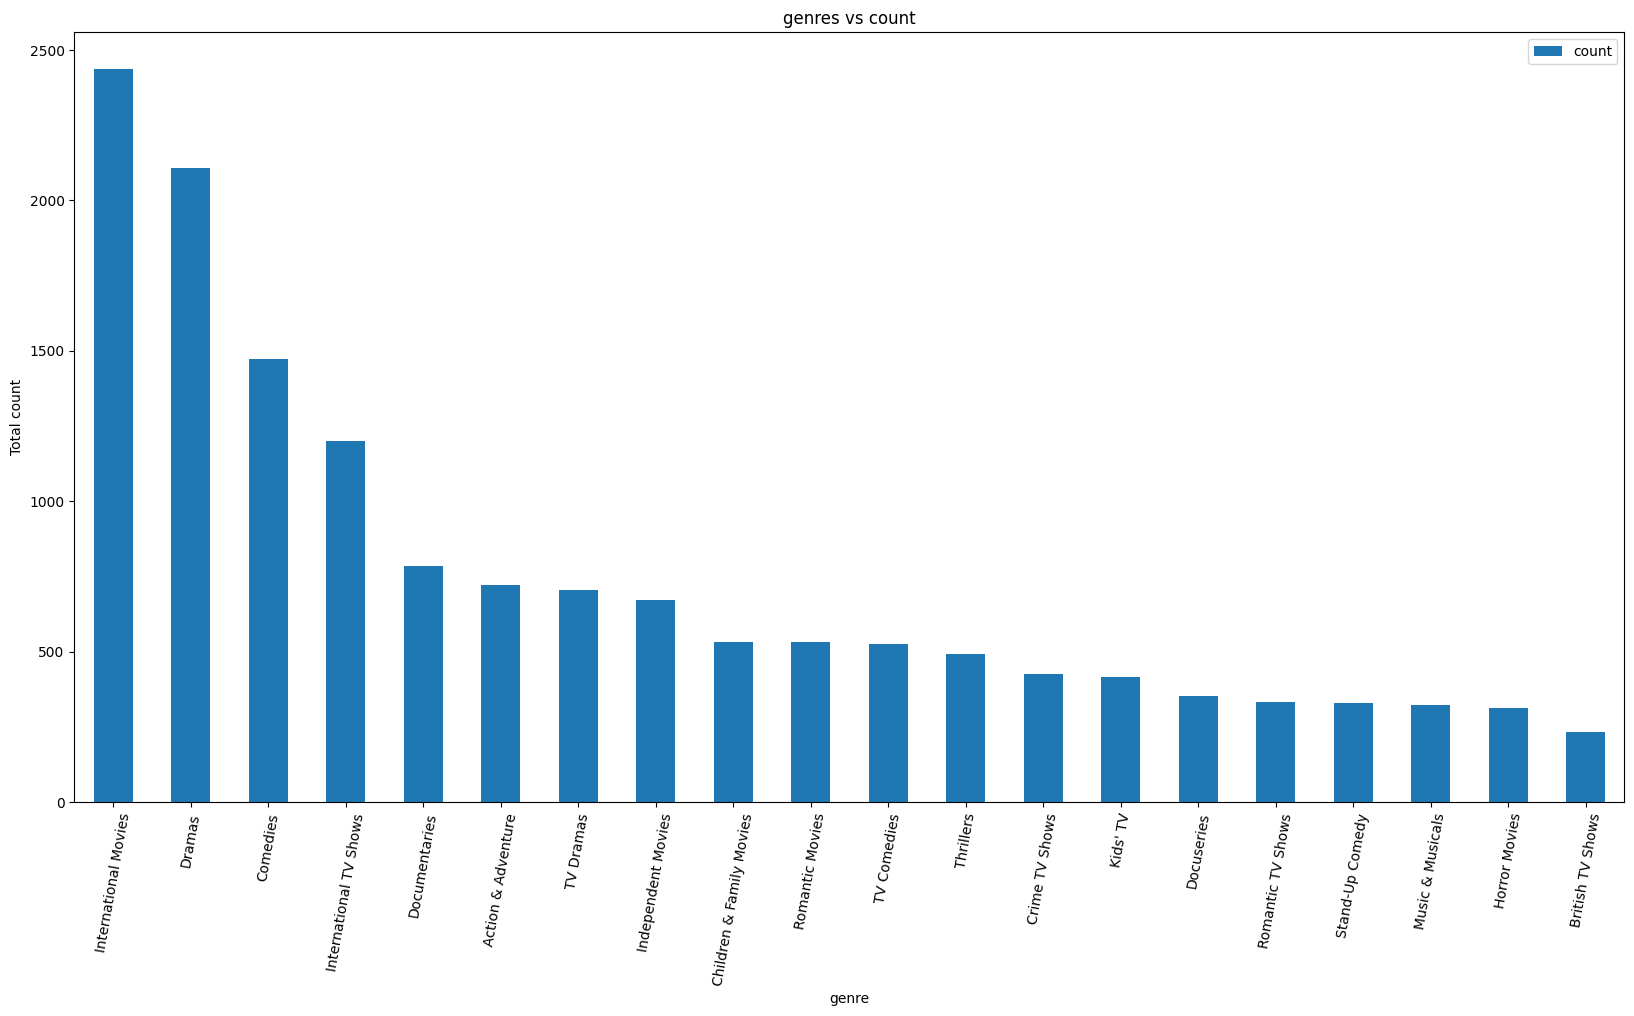

In [ ]:
# Plot the graph for 'genre'
genre_df.head(20).plot(kind='bar')
plt.xlabel("genre")
plt.ylabel("Total count")
plt.title("genres vs count")
plt.xticks(rotation=80)

##### 1. Why did you pick the specific chart?

Column chart is good to see the distribution of categorical variable.

The column chart shows the distribution of genre.

##### 2. What is/are the insight(s) found from the chart?

The genre which on which most movies and TV shows made are international movies, dramas, comedies, and so on.

#### Chart - 8
# Bivariate visualization for 'type' and 'rating'

Text(0.5, 1.0, 'Count of TV Shows and Movies by Rating')

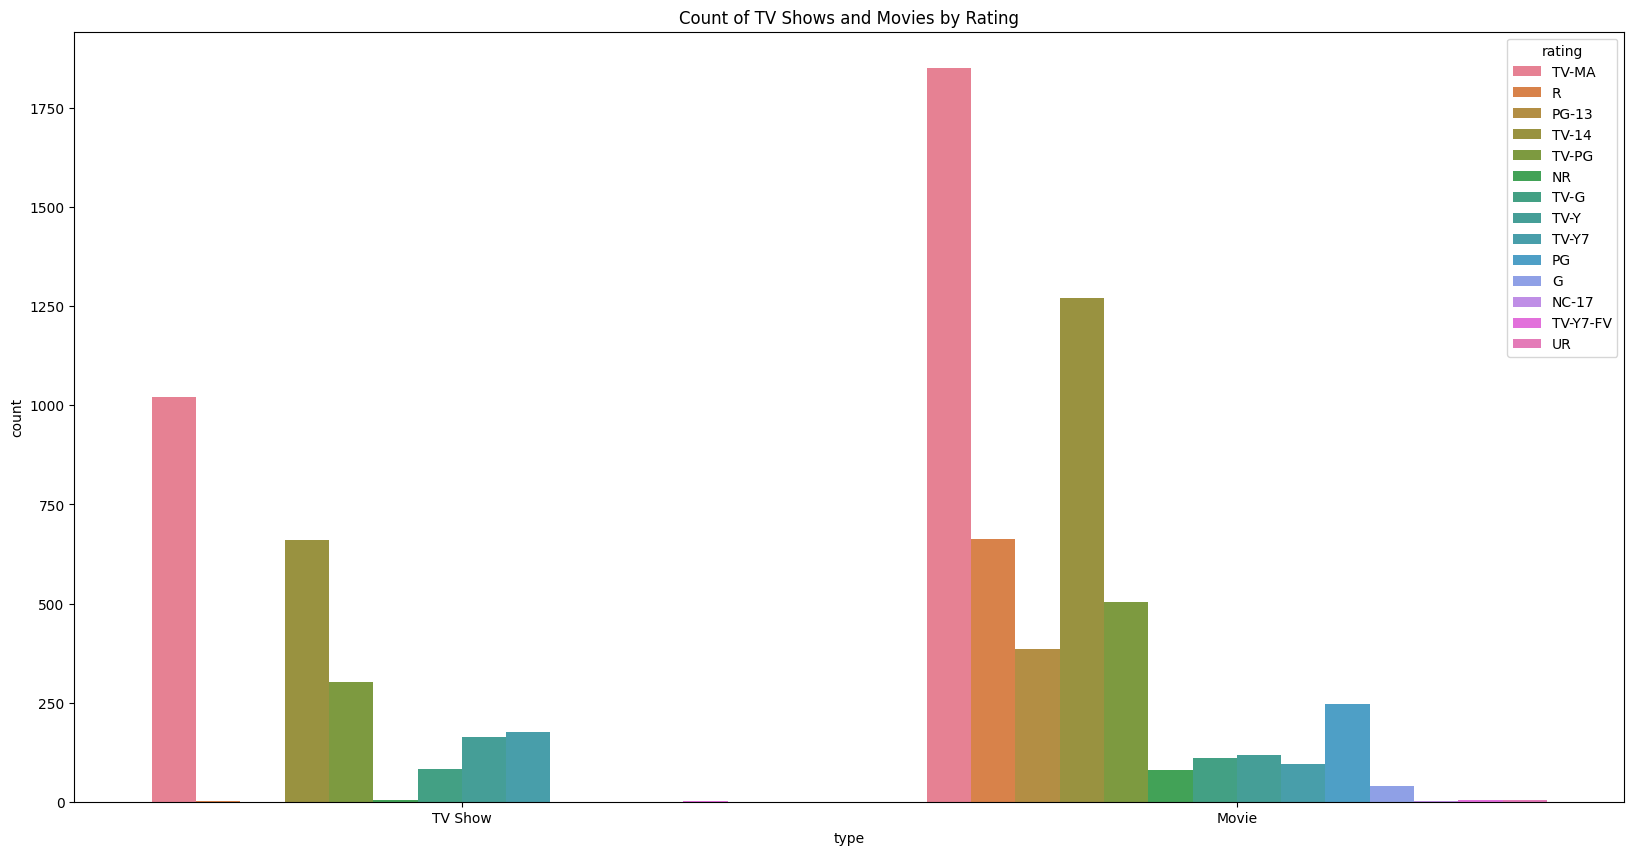

In [ ]:
# Chart - 5 visualization code

# Bivariate visualization for 'type' and 'rating'
sns.countplot(x='type', hue='rating', data=df)
plt.title('Count of TV Shows and Movies by Rating')

##### 1. Why did you pick the specific chart?

Column chart is good to visualize the distribution of categorical variable.

The chart shows the distribution of rating for movies and TV shows seperate.

##### 2. What is/are the insight(s) found from the chart?

The most rating in movies category is TV-MA, TV-14.

The most rating in TV shows category is TV-MA, TV-14.

#### Chart - 9
# Bivariate visualization for 'type' and 'country'

In [ ]:
# Chart - 6 visualization code

# Bivariate visualization for 'type' and 'country'
sns.countplot(x='type', hue='country', data=df, hue_order=df['country'].value_counts().drop('Unknown').iloc[:5].index)

plt.title('Count of TV Shows and Movies by Country (Top 5)')
plt.xticks(rotation=45)

##### 1. Why did you pick the specific chart?

The given chart shows the distribution of countries for movies and TV shows seperate.

##### 2. What is/are the insight(s) found from the chart?

The countries which have most movies are USA, INDIA, UK.

The countries which have most TV shows are USA, UK, Japan.

#### Chart - 10
# Bivariate visualization for 'rating' and 'country'

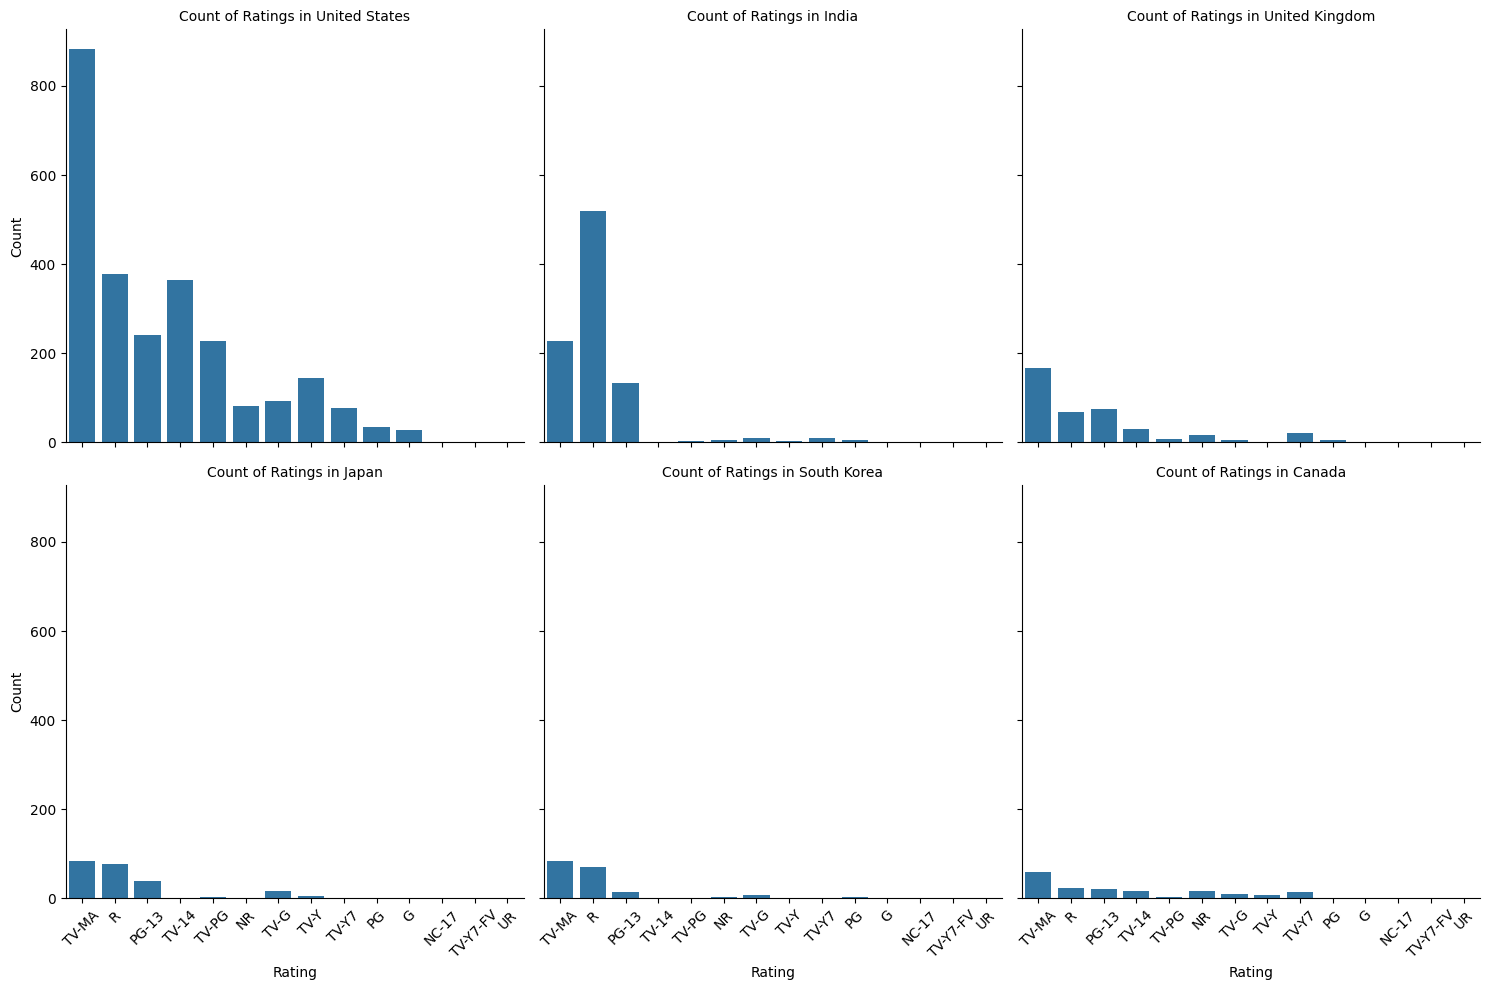

In [ ]:
# Assuming df is your DataFrame
top_countries = df['country'].value_counts().drop('Unknown').iloc[:6].index

# Create a FacetGrid with one row and the number of columns equal to the number of top countries
grid = sns.FacetGrid(df[df['country'].isin(top_countries)], col='country', col_wrap=3, height=5)

# Map the countplot onto the grid for each country
grid.map(sns.countplot, 'rating', order=df['rating'].value_counts().index)

# Set titles and adjust layout
grid.set_titles('Count of Ratings in {col_name}')
grid.set_axis_labels('Rating', 'Count')
grid.set_xticklabels(df['rating'].unique(),rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Here, there are 6 column chart for distribution of rating, each one is for different countries.

##### 2. What is/are the insight(s) found from the chart?

The most rating given by different countries.

USA - TV-MA, R, TV-14.

India - R, TV-MA, PG-13.

UK - TV-MA, R, PG-13.

Japan - TV-MA, R, PG-13.

South Korea - TV-MA, R, PG-13.

Canada - TV-MA.

#### Chart - 11
# Bivariate analysis of duration features with release year

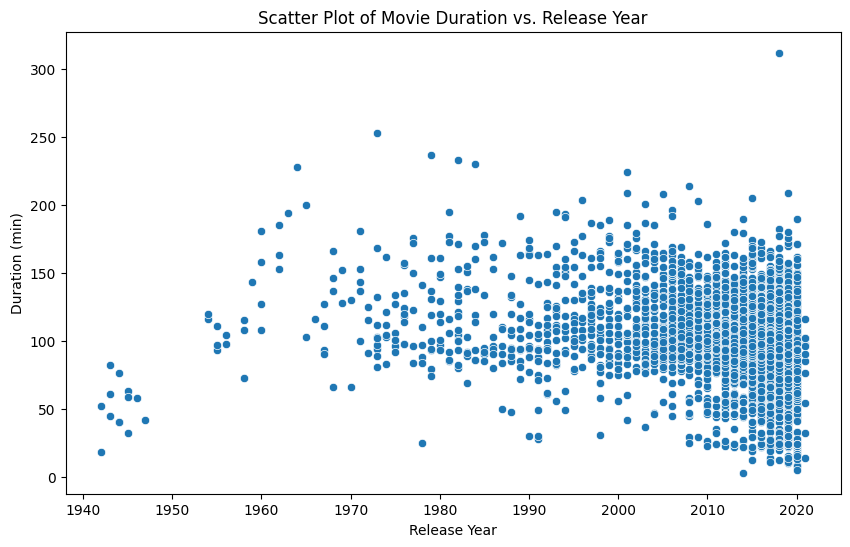

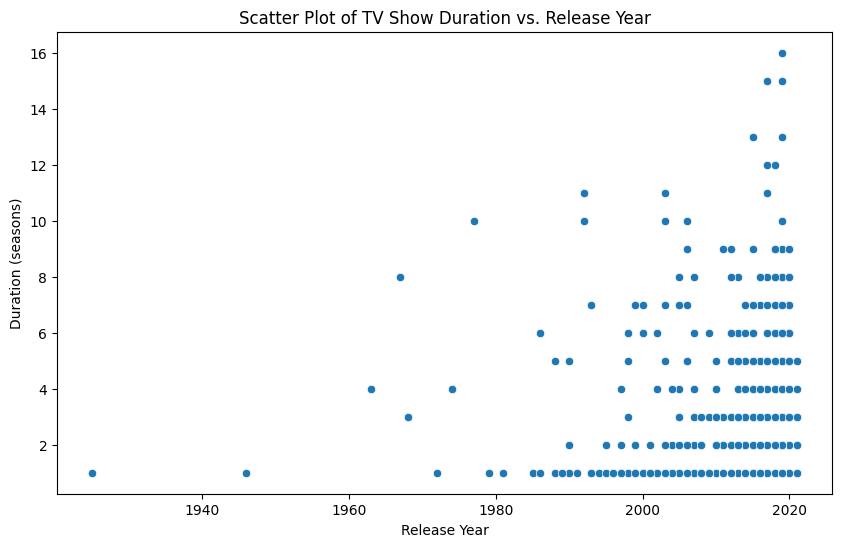

In [ ]:
# Chart - 8 visualization code
# Bivariate analysis of duration features with release year

# Scatter plot of movie duration vs. release year
plt.figure(figsize=(10, 6))
sns.scatterplot(x='release_year', y='duration_min', data=df)
plt.title('Scatter Plot of Movie Duration vs. Release Year')
plt.xlabel('Release Year')
plt.ylabel('Duration (min)')
plt.show()

# Scatter plot of TV show duration vs. release year
plt.figure(figsize=(10, 6))
sns.scatterplot(x='release_year', y='duration_seasons', data=df)
plt.title('Scatter Plot of TV Show Duration vs. Release Year')
plt.xlabel('Release Year')
plt.ylabel('Duration (seasons)')
plt.show()

##### 1. Why did you pick the specific chart?

Scatter plot is good choice to visualize the distribution two numerical features.
In first scatter plot shows the duration(movies) verses release year chart, where as second shows duration(seasons) verses release year chart

##### 2. What is/are the insight(s) found from the chart?

1 . The most of point toward right side of chart means most movies listed of release year after 2000.

Before 1950, the duration of movies is less as compare to after 1950 movies

2 . The trend of TV shows starts after 1980.

Till 1980 the number of season limited to 1. After that number of season are increased.



#### Chart - 12
# Bivariate analysis for "Listed in" and "Type"

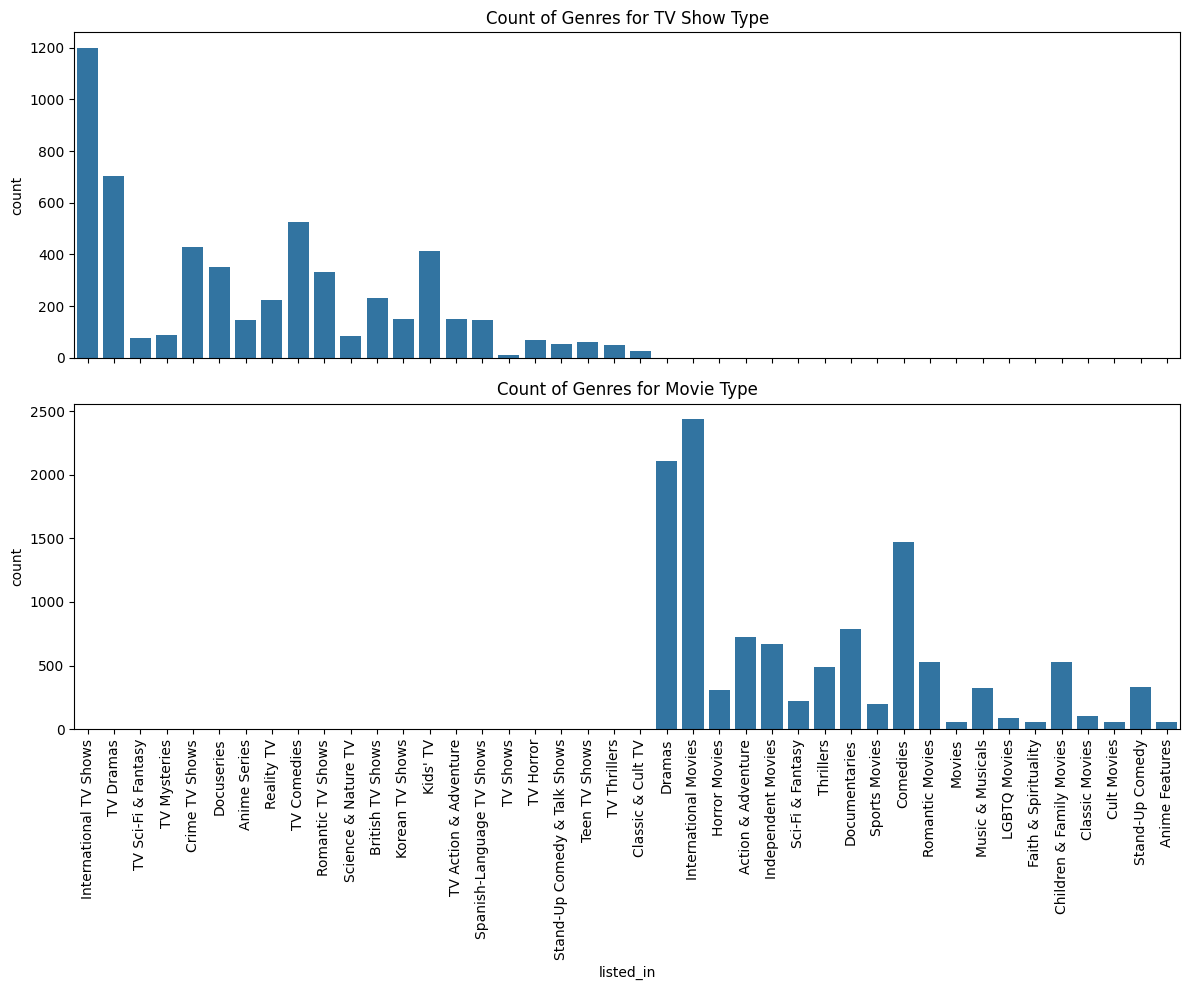

In [ ]:
# Chart - 12 visualization code

# split the df by genre
df_listed_in_split = df['listed_in'].str.split(',').explode().str.strip()

# Create a new DataFrame with the exploded "listed_in" column
df_expanded = pd.DataFrame({'listed_in': df_listed_in_split, 'type': df['type']})

# Set up subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Create count plots for each type
for i, type_val in enumerate(df['type'].unique()):
    sns.countplot(x='listed_in', data=df_expanded[df_expanded['type'] == type_val], ax=axes[i])
    axes[i].set_title(f'Count of Genres for {type_val} Type')
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

Column chart is good to visualize the distribution of categorical variable.

The column chart shows the distribution of genre for seperate type (movies/TV shows).

##### 2. What is/are the insight(s) found from the chart?

Most common genre in TV shows are dramas, international movies, sport movies.

Most common genre in movies are international movies, dramas, comedies.

#### Chart - 13
# Trend of number of movies/TV shows release per year.

Text(0.5, 0, 'Release year')

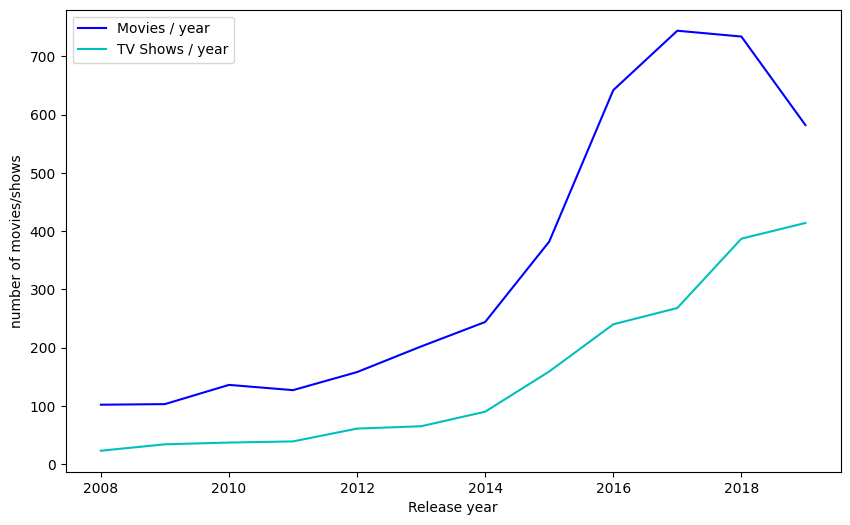

In [ ]:
# Chart - 13 visualization code

plt.figure(figsize=(10, 6))
#Define displayed years:
years = list(range(2008,2020,1))

#separate movies and tv_shows:
movie_rows = df.loc[df["type"] == "Movie"]
tv_rows = df.loc[df["type"] == "TV Show"]

#Count movies / tv shows per year
movies_counts = movie_rows.release_year.value_counts()
tv_counts = tv_rows.release_year.value_counts()

index_years_mov = movies_counts.index.isin(years)
index_years_tv = tv_counts.index.isin(years)

#select movies / tv shows between chosen years:
movies = movies_counts[index_years_mov]
tv_shows = tv_counts[index_years_tv]

#Line plot of Movies and TV Shows released by Netflix per year")
sns.lineplot(data=movies, color="b", label="Movies / year")
sns.lineplot(data=tv_shows, color="c", label="TV Shows / year")

# label
plt.ylabel('number of movies/shows')
plt.xlabel('Release year')

##### 1. Why did you pick the specific chart?

Line chart is always a good pick to visualize the trends.

The line chart shows the trends of movies and TV shows over release year

##### 2. What is/are the insight(s) found from the chart?

The trend of movies grow rapidly from 2012 but start declining from 2017.

The trend of TV shows grow normally.

#### Chart - 14 - Correlation Heatmap

<ipython-input-38-63dd38164d2c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), vmin=-1, cmap='coolwarm', annot=True)


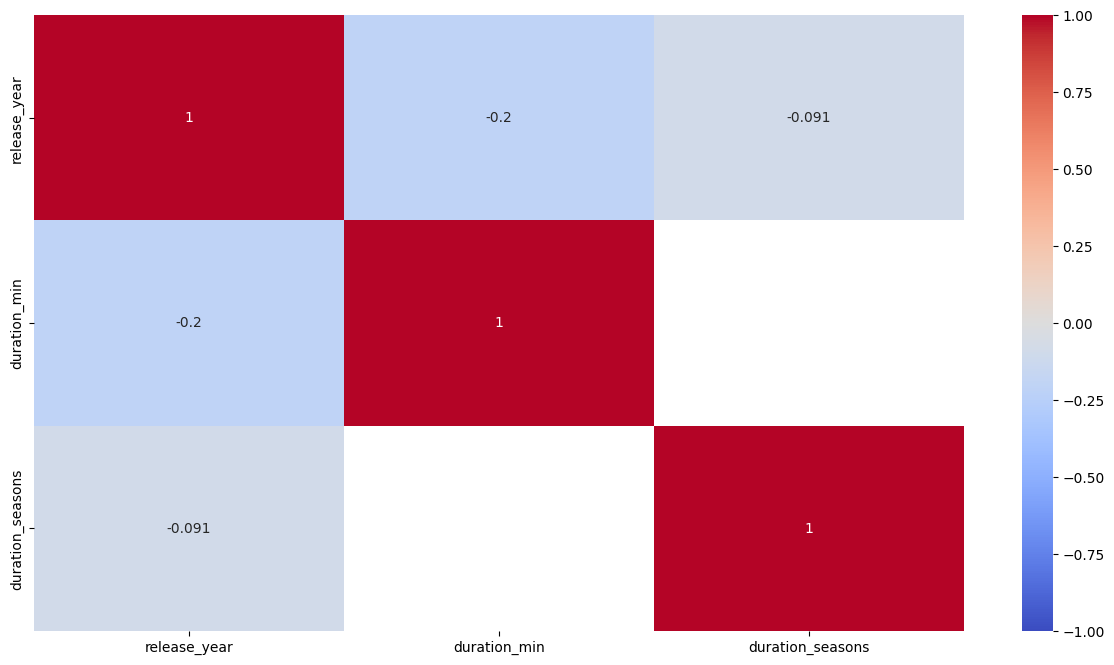

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), vmin=-1, cmap='coolwarm', annot=True)
plt.show()

##### 1. What is/are the insight(s) found from the chart?

We have no correlation between duration and release year.

#### Chart - 15 - Pair Plot

<Figure size 1000x800 with 0 Axes>

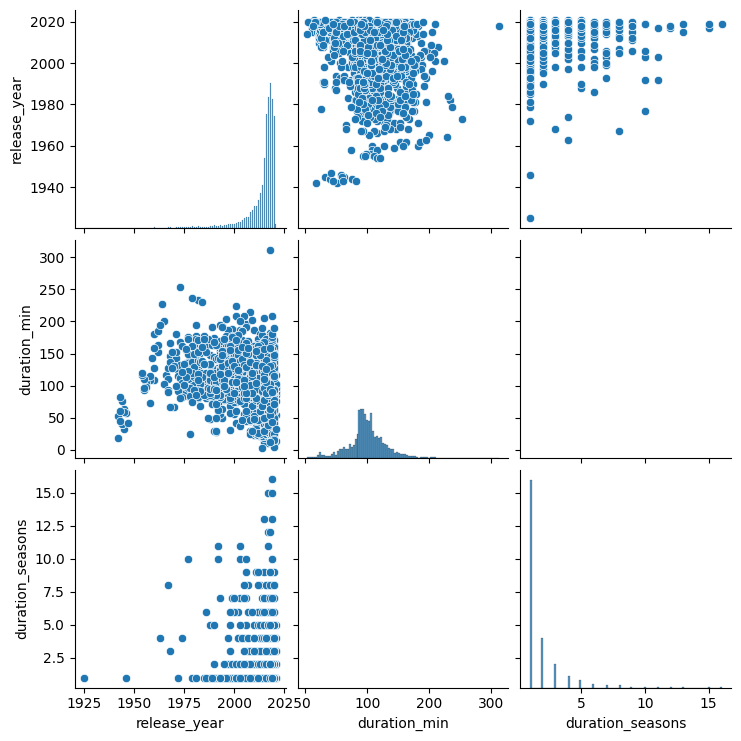

In [ ]:
# Pair Plot visualization code
plt.figure(figsize=(10,8))
ax=sns.pairplot(df)
plt.show()

##### 1. What is/are the insight(s) found from the chart?

As the release year increasing(recent years) the number of data point also increases that means movies/TV shows more listed from recent years.

## ***5. Hypothesis Testing***

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### Hypothetical Statement - 1

In [ ]:
#head of df_hypothesis
#making copy of df
netflix_hypothesis=df.copy()
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  duration_min  \
0  In a future where the elite inhabit an island ...           NaN   
1  After a devastating earthquake hits Mexico Cit...          93.0   
2  When an army recruit is found dead, his fellow...          78.0   
3  In a postapocalyptic world, rag-doll robots hi...          80.0   
4  A brilliant group of students become card-coun...         123.0   

   duration_seasons  
0               4.0  
1               NaN  
2               NaN  
3               NaN  
4               NaN

In [ ]:
#filtering movie from Type_of_show column
netflix_hypothesis = df[df["type"] == "Movie"]

In [ ]:
#with respect to each ratings assigning it into group of categories
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
netflix_hypothesis['target_ages'] = netflix_hypothesis['rating'].replace(ratings_ages)
#let's see unique target ages
netflix_hypothesis['target_ages'].unique()


array(['Adults', 'Teens', 'Older Kids', 'Kids'], dtype=object)

In [ ]:
netflix_hypothesis['target_ages'] = pd.Categorical(netflix_hypothesis['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

netflix_hypothesis['duration'] = netflix_hypothesis['duration'].astype(str)  # Convert to string type
netflix_hypothesis['duration'] = netflix_hypothesis['duration'].str.extract('(\d+)')
netflix_hypothesis['duration'] = pd.to_numeric(netflix_hypothesis['duration'])

netflix_hypothesis.head(3)

show_id   type  title           director  \
1      s2  Movie   7:19  Jorge Michel Grau   
2      s3  Movie  23:59       Gilbert Chan   
3      s4  Movie      9        Shane Acker   

                                                cast        country  \
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   

          date_added  release_year rating  duration  \
1  December 23, 2016          2016  TV-MA        93   
2  December 20, 2018          2011      R        78   
3  November 16, 2017          2009  PG-13        80   

                                           listed_in  \
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   

                                         description  duration_min  \
1  After a devastating earthquake hits Mexico Cit...          93.0   
2  When an army recruit is found dead, his fellow...          78.0   
3  In a postapocalyptic world, rag-doll robots hi...          80.0   

   duration_seasons target_ages  
1               NaN      Adults  
2               NaN      Adults  
3               NaN       Teens

In [ ]:
#group_by duration and target_ages
group_by_= netflix_hypothesis[['duration','target_ages']].groupby(by='target_ages')
#mean of group_by variable
group=group_by_.mean().reset_index()
group

target_ages    duration
0        Kids   66.486891
1  Older Kids   92.024648
2       Teens  110.025332
3      Adults   98.230769

In [ ]:
#In A and B variable grouping values
A= group_by_.get_group('Kids')
B= group_by_.get_group('Older Kids')
#mean and std. calutation for kids and older kids variables
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean for movies rated for Kids {} \n Mean for  movies rated for older kids {}'.format(M1,M2))
print('Std for  movies rated for Older Kids {} \n Std for  movies rated for kids {}'.format(S2,S1))

Mean for movies rated for Kids duration    66.486891
dtype: float64 
 Mean for  movies rated for older kids duration    92.024648
dtype: float64
Std for  movies rated for Older Kids duration    31.182577
dtype: float64 
 Std for  movies rated for kids duration    31.739465
dtype: float64


#### Pooled Variance and Pooled Standard Deviation:

**Pooled Variance (`sp^2`):**
In a two-sample t-test, you are often comparing the means of two independent samples. The assumption of equal variances is important for the validity of the test. When the variances of the two samples are assumed to be equal, you can calculate a pooled variance. The formula for pooled variance is:

sp^2 = [ (n1-1)*s1^2 + (n2-1)*s2^2 ] / (n1 + n2 -2)

where:
- \( n1 \) and \( n2 \) are the sample sizes of the two groups.
- \( s1^2 \) and \( s2^2 \) are the sample variances of the two groups.

**Pooled Standard Deviation (`sp`):**
\[ sp = sqrt{sp^2} \]

### t-value:

The t-value measures the difference between means relative to the within-group variability:

t = (X1-X2) / sqrt[s1^2/n1  + s2^2/n2]

where:
- X1 and X2 are the sample means of the two groups.
- s1^2 and s2^2 are the sample variances of the two groups.
- n1 and n2 are the sample sizes of the two groups.


In [ ]:
#import stats
from scipy import stats
#length of groups and DOF(degree of freedom)
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

267 852
dof 1117
SP_2 = duration    999.049147
dtype: float64
SP duration    31.607739
dtype: float64
tvalue -11.51992627853396


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

HO:Movies rated for kids and older kids are at least two hours long.(Null Hypothesis)

H1:Movies rated for kids and older kids are not at least two hours long.(Alternate Hypothesis)

#### 2. Perform an appropriate statistical test.

In [ ]:
#t-distribution
stats.t.ppf(0.025,dof)

-1.9620900365868952

In [ ]:
#t-distribution
stats.t.ppf(0.975,dof)

1.9620900365868947

t-value is not in the range, the null hypothesis is rejected.

As a result, movies rated for kids and older kids are not at least two hours long.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H1:The duration which is more than 90 mins are movies

HO:The duration which is more than 90 mins are NOT movies

#### 2. Perform an appropriate statistical test.

In [ ]:
#making copy of df_clean_frame
netflix_hypothesis=df.copy()
#head of df_hypothesis
netflix_hypothesis.head()

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  duration_min  \
0  In a future where the elite inhabit an island ...           NaN   
1  After a devastating earthquake hits Mexico Cit...          93.0   
2  When an army recruit is found dead, his fellow...          78.0   
3  In a postapocalyptic world, rag-doll robots hi...          80.0   
4  A brilliant group of students become card-coun...         123.0   

   duration_seasons  
0               4.0  
1               NaN  
2               NaN  
3               NaN  
4               NaN

In [ ]:
netflix_hypothesis['duration']= netflix_hypothesis['duration'].str.extract('(\d+)')
netflix_hypothesis['duration'] = pd.to_numeric(netflix_hypothesis['duration'])

In [ ]:
netflix_hypothesis['type'] = pd.Categorical(netflix_hypothesis['type'], categories=['Movie','TV Show'])
#from duration feature extractin string part and after extracting Changing the object type to numeric
#df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
#df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#head of df_
netflix_hypothesis.head(3)


show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   

                                                cast    country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...     Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...     Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...  Singapore   

          date_added  release_year rating  duration  \
0    August 14, 2020          2020  TV-MA         4   
1  December 23, 2016          2016  TV-MA        93   
2  December 20, 2018          2011      R        78   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   

                                         description  duration_min  \
0  In a future where the elite inhabit an island ...           NaN   
1  After a devastating earthquake hits Mexico Cit...          93.0   
2  When an army recruit is found dead, his fellow...          78.0   

   duration_seasons  
0               4.0  
1               NaN  
2               NaN

In [ ]:
netflix_hypothesis['type'] = pd.Categorical(netflix_hypothesis['type'], categories=['Movie','TV Show'])

In [ ]:
# Perform Statistical Test to obtain P-Value
#group_by duration and TYPE
group_by_= netflix_hypothesis[['duration','type']].groupby(by='type')
#mean of group_by variable
group1=group_by_.mean().reset_index()
group1

type   duration
0    Movie  99.307978
1  TV Show   1.775934

In [ ]:
#In A and B variable grouping values
A= group_by_.get_group('Movie')
B= group_by_.get_group('TV Show')
#mean and std
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean  {}'.format(M1,M2))
print('Std  {}'.format(S2,S1))

Mean  duration    99.307978
dtype: float64
Std  duration    1.596359
dtype: float64


In [ ]:
#import stats
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])


5377 2410
dof 7785
SP_2 = duration    253.64841
dtype: float64
SP duration    15.926343
dtype: float64
tvalue 249.81856492927665


##### Which statistical test have you done to obtain p-Value?

In [ ]:
#t-distribution
stats.t.ppf(0.025,dof)

-1.9602687544602204

In [ ]:
#t-distribution
stats.t.ppf(0.975,dof)


1.96026875446022

Because the t-value is not in the range, the null hypothesis is rejected.

As a result, The duration which is more than 90 mins are movies

## ***6. Feature Engineering & Data Pre-processing***

In [ ]:
# Combining all the clustering attributes into a single column
df['clustering'] = (df['director'] + ' ' + df['cast'] +' ' +
                                 df['country'] +' ' + df['listed_in'] +
                                 ' ' + df['description'])


In [ ]:
df['clustering'][25]

'Lyric R. Cabral, David Felix Sutcliffe Unknown United States Documentaries This real-life look at FBI counterterrorism operations features access to both sides of a sting: the government informant and the radicalized target.'

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
import nltk
nltk.download('all',quiet=True)
from PIL import Image


In [ ]:
# Expand Contraction
# Lower Casing
# Remove Punctuations
# Remove URLs & Remove words and digits contain digits
# Remove Stopwords
# Remove White spaces
# Rephrase Text
# Tokenization
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

def transform_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Tokenize text into words
    words = nltk.word_tokenize(text)

    # Remove non-alphanumeric characters
    words = [word for word in words if word.isalnum()]

    # Remove stopwords and punctuation
    stopwords_set = set(stopwords.words('english'))
    punctuation_set = set(string.punctuation)
    words = [word for word in words if word not in stopwords_set and word not in punctuation_set]

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Join words into a string and return
    return ' '.join(lemmatized_words)

In [ ]:
df['Clean_Text'] = df['clustering'].apply(transform_text)


In [ ]:
df["Clean_Text"][50]


'roland emmerich steven strait camilla belle cliff curtis joel virgel affif ben badra mo zinal nathanael baring mona hammond omar sharif united state south africa action adventure fierce mammoth hunter set impossible journey rescue woman love vicious warlord save people village'

####  Text Vectorization

TF-IDF combines two metrics: Term frequency (TF) and inverse document frequency (IDF).

Term Frequency (TF): This metric measures the frequency of a term in a document. It assumes that the more often a term appears in a document, the more relevant it is to that document. It is calculated using the formula:

TF(t, d) = (Number of times term t appears in document d) / (Total number of terms in document d)

Inverse Document Frequency (IDF): This metric measures the importance of a term across a collection of documents. It gives higher weight to terms that appear less frequently in the entire collection. It is calculated using the formula:

IDF(t) = log_e(Total number of documents / Number of documents containing term t)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Vectorizing Text
bag_of_words = df.Clean_Text

In [ ]:
t_vectorizer = TfidfVectorizer(max_features=20000)
X= t_vectorizer.fit_transform(bag_of_words)

In [ ]:
print(X.shape)

(7787, 20000)


In [ ]:
t_vectorizer.get_feature_names_out()

array(['007', '10', '100', ..., 'şafak', 'şahin', 'şinasi'], dtype=object)

### 7. Dimesionality Reduction

Do you think that dimensionality reduction is needed? Explain Why
PCA to reduce the dimensionality of the dataset. PCA identifies the directions (principal components) along which the data varies the most. These components are ordered by the amount of variance they explain in the data.

In [ ]:
# DImensionality Reduction (If needed)
#PCA Code
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
transformer = PCA()
transformer.fit(X.toarray())

PCA()

Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)


PCA can extract the most relevant features from a dataset. It transforms the original features into a new set of uncorrelated variables called principal components. These components are linear combinations of the original features and capture the maximum amount of variation present in the data.

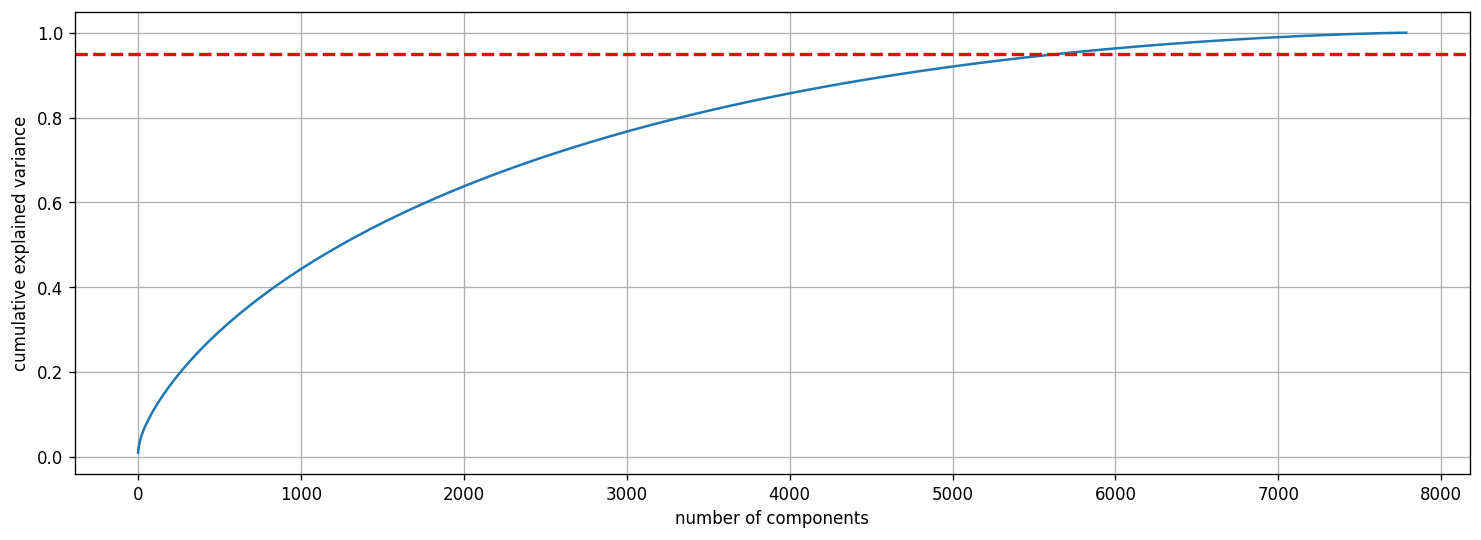

In [ ]:
# Lets plot explained var v/s comp to check how many components to be considered.
 #explained var v/s comp
# Add a grid to the plot
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5), dpi=120)
plt.plot(np.cumsum(transformer.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y=0.95, color='r', linestyle='--',linewidth=2, label='95% Explained Variance')
plt.grid()
plt.show()

The plot helps in determining the number of components to consider for dimensionality reduction. You can select the number of components where the cumulative explained variance reaches a satisfactory threshold, such as 95%. The point where the curve intersects or is closest to the threshold line can guide you in choosing the appropriate number of components for your analysis.

In [ ]:
# Import the necessary libraries
from sklearn.decomposition import PCA
# Create an instance of PCA with the desired explained variance ratio
pca_tuned = PCA(n_components=0.95)
# Fit the PCA model on the input data, X, which is converted to a dense array
pca_tuned.fit(X.toarray())
# Transform the input data, X, to its reduced dimensional representation
X_transformed = pca_tuned.transform(X.toarray())
# Print the shape of the transformed data to see the number of samples and transformed features
print(X_transformed.shape)

(7787, 5652)


In [ ]:
X_transformed

array([[ 0.12162836, -0.02094914,  0.00903101, ..., -0.00286586,
         0.00991739, -0.01015339],
       [-0.04725126, -0.03459489,  0.02148722, ...,  0.0012848 ,
         0.00114284,  0.00889042],
       [-0.04874292, -0.05006495, -0.03019062, ...,  0.00762546,
        -0.0095794 , -0.01023139],
       ...,
       [-0.02152173,  0.08862333,  0.16731255, ...,  0.00342657,
         0.00317341,  0.00218495],
       [ 0.10205368,  0.01071853,  0.026359  , ..., -0.00285903,
        -0.00806631,  0.00655062],
       [-0.05546546,  0.23376482,  0.14373696, ..., -0.00093523,
        -0.00193798, -0.00397004]])

## ***7. ML Model Implementation***

### ML Model - 1

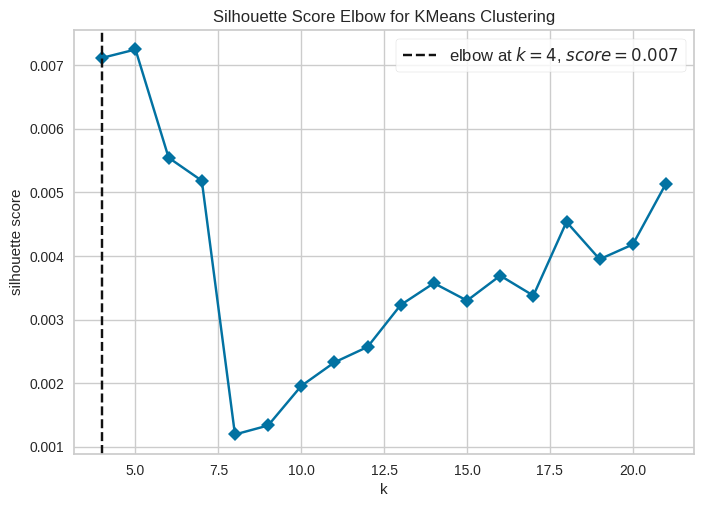

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Initialize the KMeans model with a random_state of 5
model = KMeans(random_state=5)

# Initialize the KElbowVisualizer with the KMeans model and desired parameters
visualizer = KElbowVisualizer(model, k=(4, 22), metric='silhouette', timings=False, locate_elbow=True)

# Fit the visualizer on the transformed data
visualizer.fit(X_transformed)

# Display the elbow plot
visualizer.show()


The plot will also indicate the "elbow" point, which represents the recommended number of clusters based on the selected metric.Using elbow plot with the optimal number of 5 clusters .

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score, silhouette_samples

def silhouette_score_analysis(n):

  for n_clusters in range(2,n):
      km = KMeans (n_clusters=n_clusters, random_state=5)
      preds = km.fit_predict(X_transformed)
      centers = km.cluster_centers_

      score = silhouette_score(X_transformed, preds, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(km)

      visualizer.fit(X_transformed) # Fit the training data to the visualizer
      visualizer.poof() # Draw/show/poof the data

For n_clusters = 2, silhouette score is 0.005269727989261473


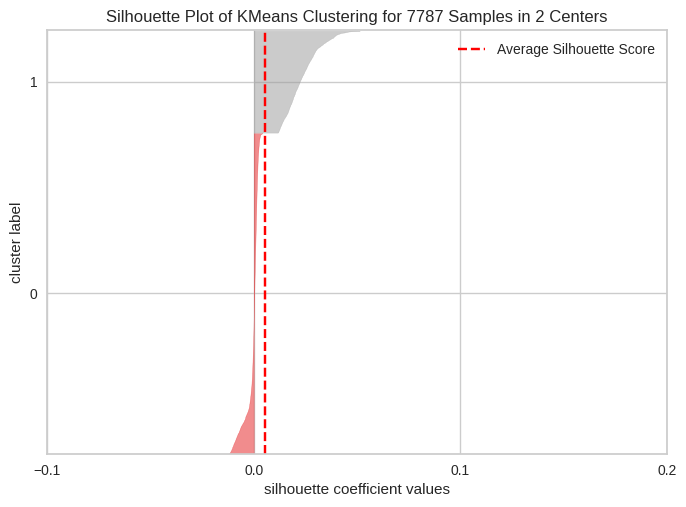

For n_clusters = 3, silhouette score is 0.0061474155659639595


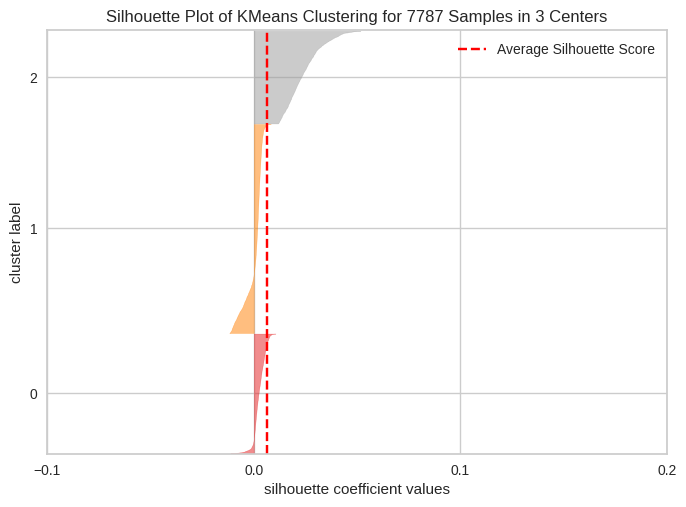

For n_clusters = 4, silhouette score is 0.007114000369566372


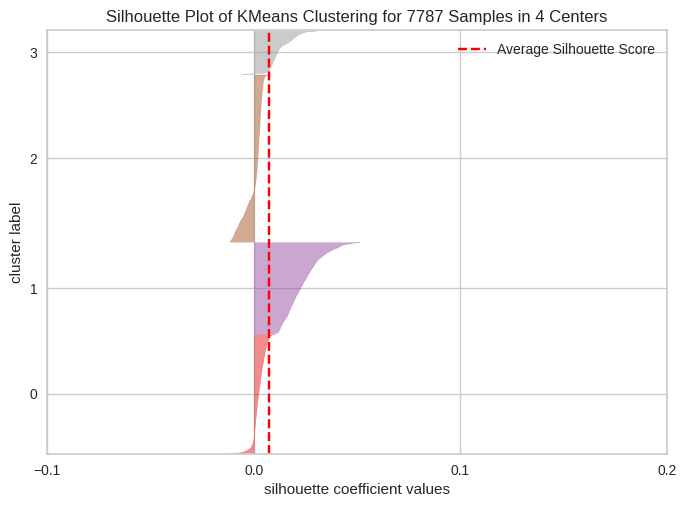

For n_clusters = 5, silhouette score is 0.0072451096498167365


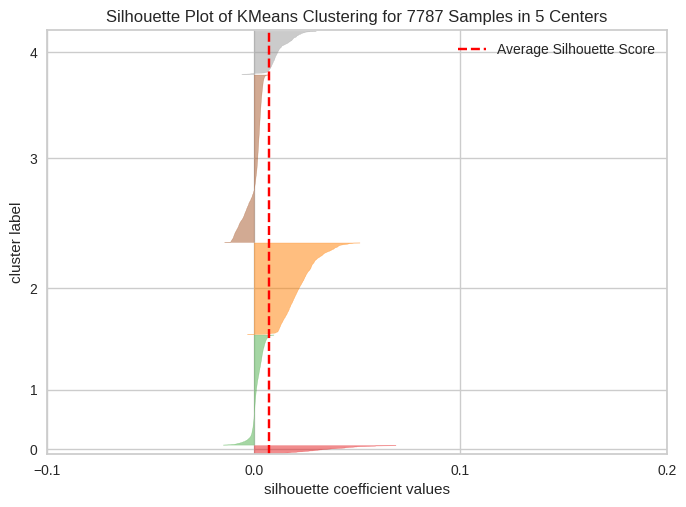

For n_clusters = 6, silhouette score is 0.00554355321617232


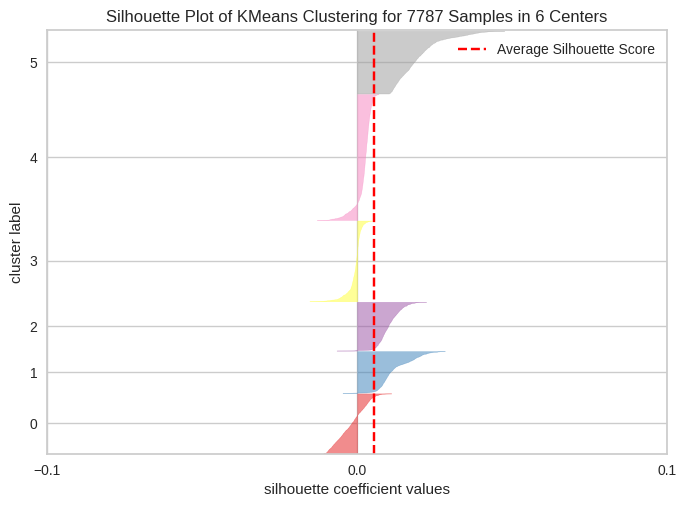

For n_clusters = 7, silhouette score is 0.005182377813977569


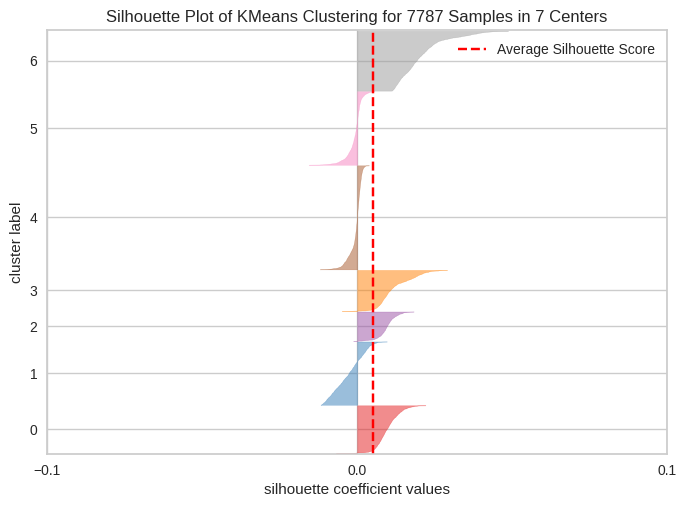

For n_clusters = 8, silhouette score is 0.0011932356236979736


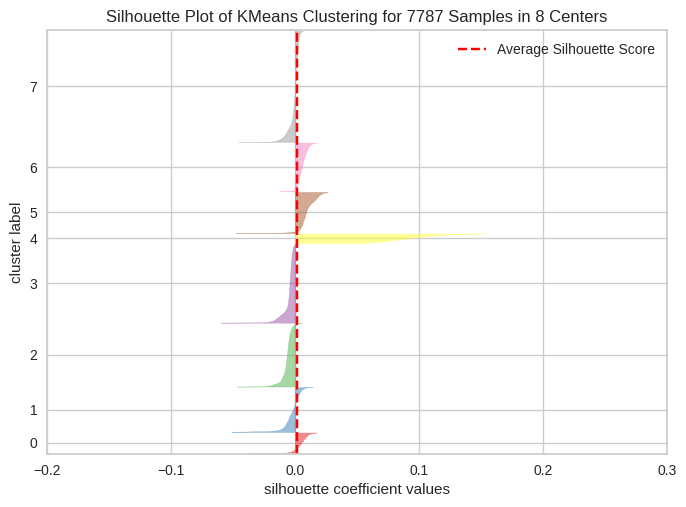

For n_clusters = 9, silhouette score is 0.0013346781883492407


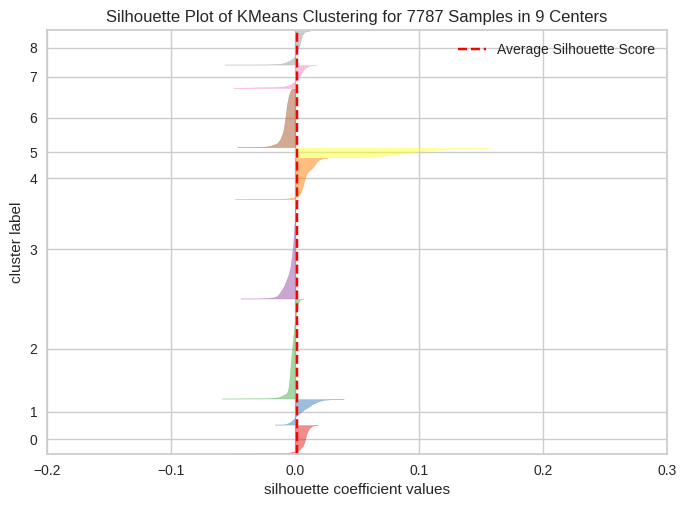

For n_clusters = 10, silhouette score is 0.0019562716436658293


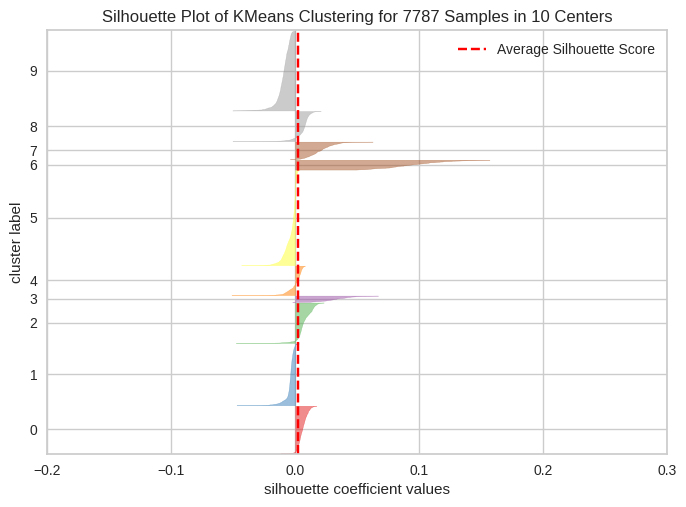

For n_clusters = 11, silhouette score is 0.002326747942376429


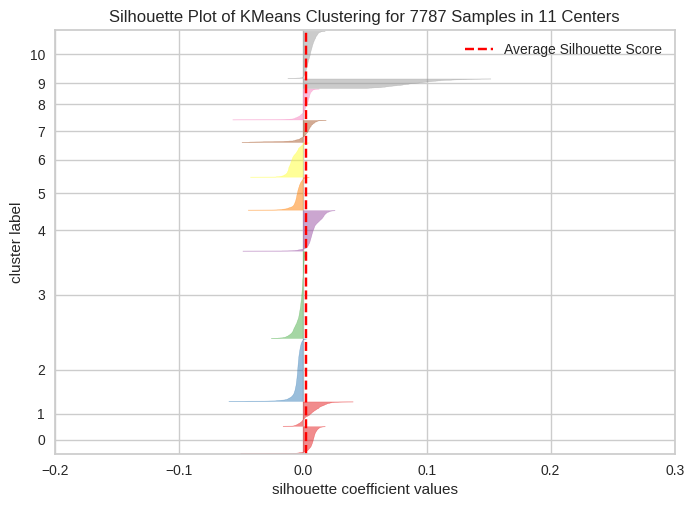

For n_clusters = 12, silhouette score is 0.0025695569492935623


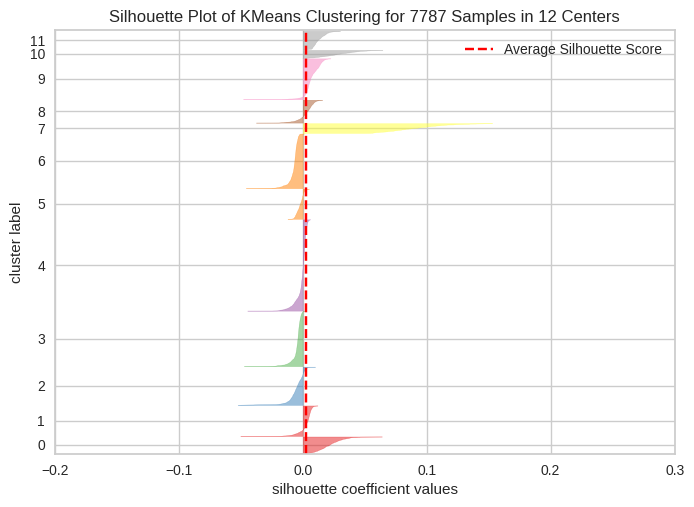

For n_clusters = 13, silhouette score is 0.0032295948844131917


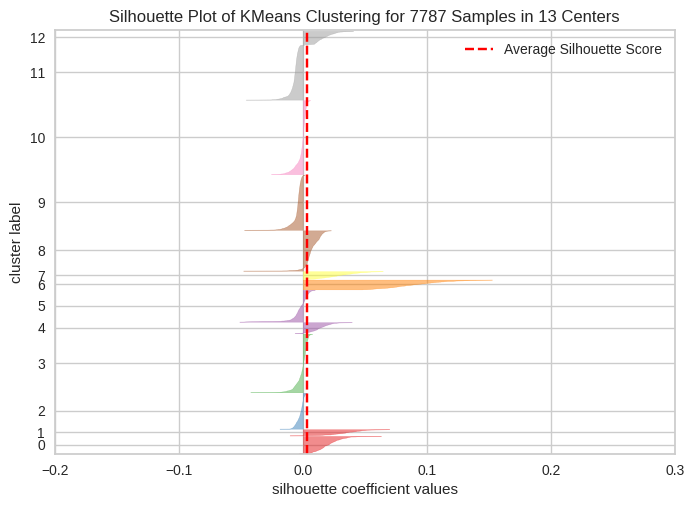

For n_clusters = 14, silhouette score is 0.0035718183569872332


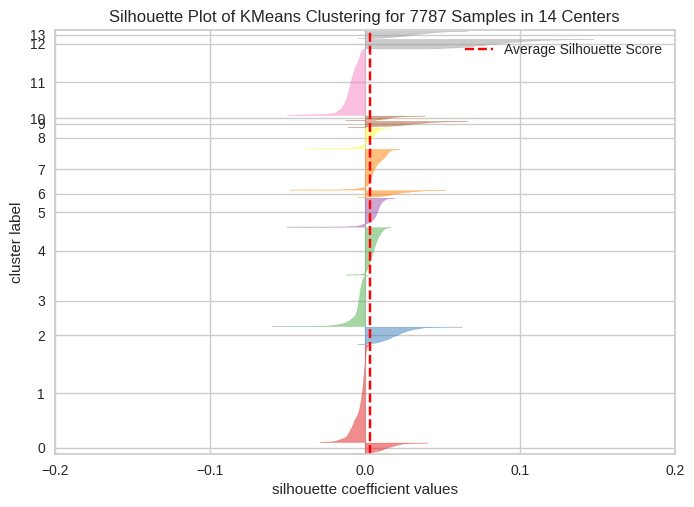

In [ ]:
silhouette_score_analysis(15)

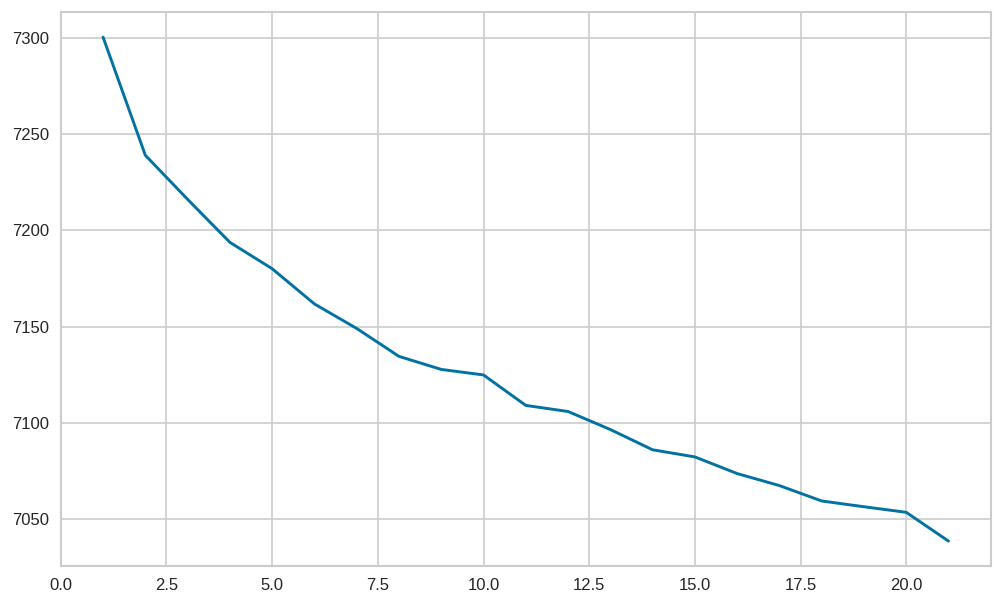

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Create a figure with a specific size and resolution
plt.figure(figsize=(10, 6), dpi=120)

# Initialize an empty list to store the within-cluster sum of squares (WCSS)
wcss = []

# Iterate over different numbers of clusters
for i in range(1, 22):
    # Create a KMeans model with default parameters
    model = KMeans(random_state=0)

    # Initialize the KMeans algorithm with specific parameters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)

    # Fit the KMeans algorithm to the transformed data
    kmeans.fit(X_transformed)

    # Append the WCSS to the list
    wcss.append(kmeans.inertia_)

# Plot the number of clusters against the WCSS
plt.plot(range(1, 22), wcss)

### ML Model - 2

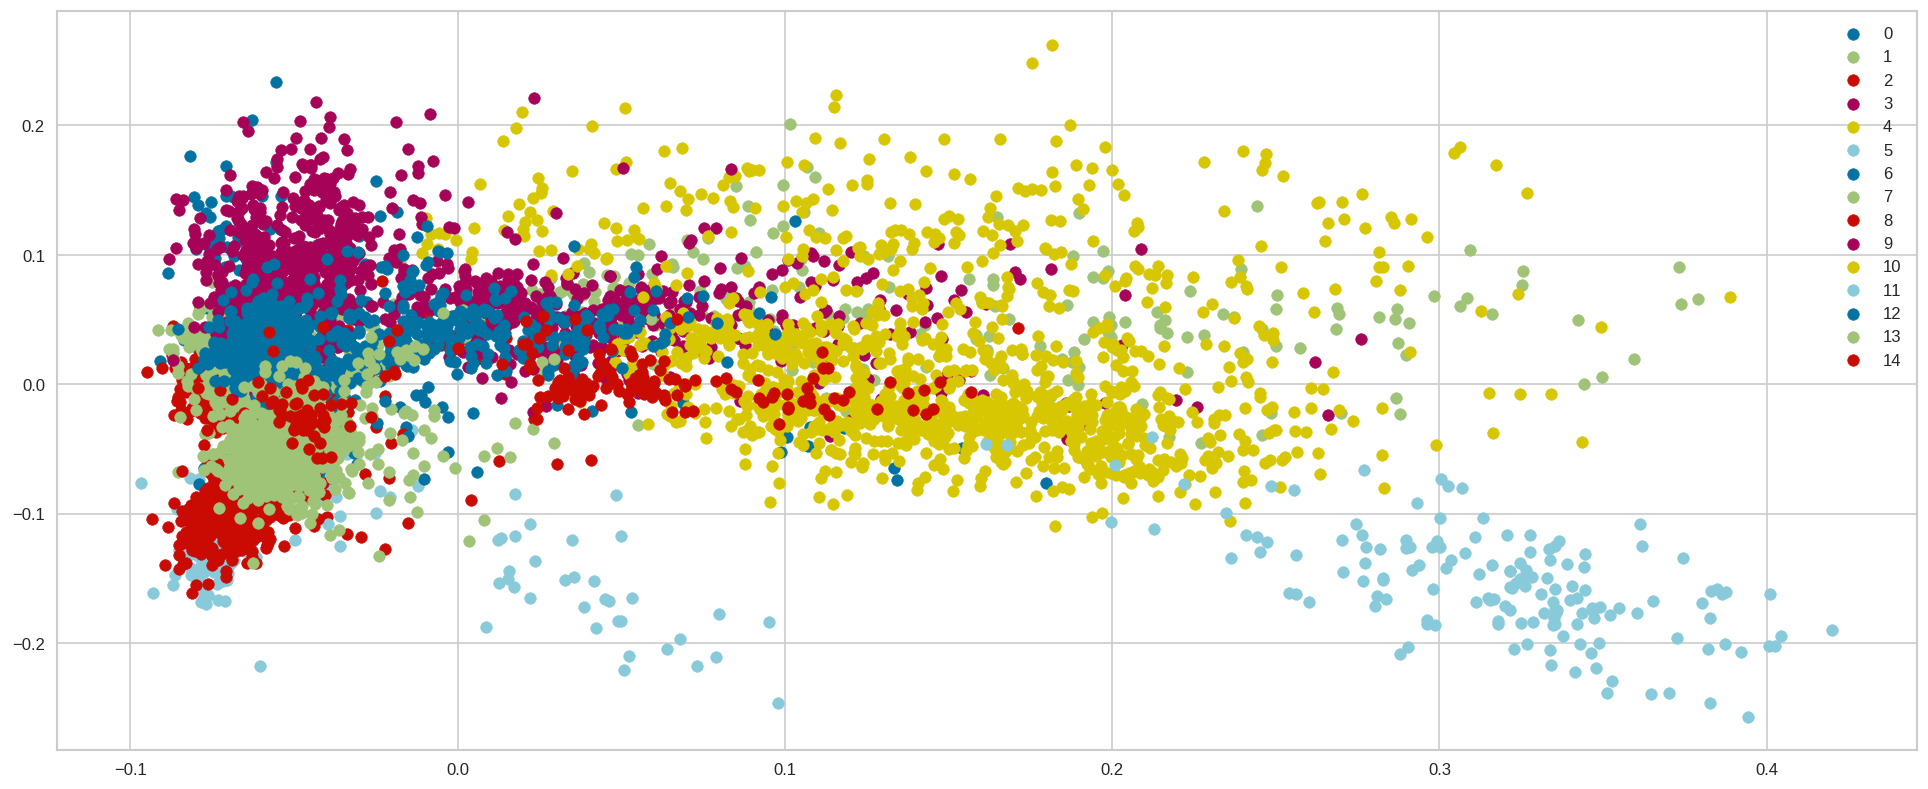

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Create a figure with a larger size and resolution
plt.figure(figsize=(20, 8), dpi=120)

# Initialize a KMeans model with 15 clusters
kmeans = KMeans(n_clusters=15, init='k-means++', random_state=9)

# Fit the KMeans algorithm to the transformed data
kmeans.fit(X_transformed)

# Predict the labels of the clusters
label = kmeans.fit_predict(X_transformed)

# Get unique labels from the predictions
unique_labels = np.unique(label)

# Plot the results
for i in unique_labels:
    # Scatter plot the points belonging to each cluster
    plt.scatter(X_transformed[label == i, 0], X_transformed[label == i, 1], label=i)

# Display a legend to identify the clusters
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Add cluster values to the dateframe.
df['cluster_number'] = kmeans.labels_
df.head(1)

show_id     type title director  \
0      s1  TV Show    3%  Unknown   

                                                cast country       date_added  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...  Brazil  August 14, 2020   

   release_year rating   duration  \
0          2020  TV-MA  4 Seasons   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   

                                         description  duration_min  \
0  In a future where the elite inhabit an island ...           NaN   

   duration_seasons                                         clustering  \
0               4.0  Unknown João Miguel, Bianca Comparato, Michel ...   

                                          Clean_Text  cluster_number  
0  unknown joão miguel bianca comparato michel go...              10

In [ ]:
# Count the number of movies or TV shows in each cluster
cluster_content_count = df['cluster_number'].value_counts().reset_index().rename(columns={'index': 'clusters', 'clusters': 'Movies/TV_Shows'})

# Print the cluster content count
print(cluster_content_count)

#

    clusters  cluster_number
0         12            1075
1          2             988
2         10             970
3         13             952
4          8             670
5          9             653
6          7             510
7          3             408
8          5             311
9          4             300
10        14             207
11         0             207
12         1             204
13        11             182
14         6             150


### ML Model - 3

In [ ]:
#word cloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
def word_count(category):
  print("Exploring Cluster", category)
  col_names = ['type','title','country','rating','listed_in','description']
  for i in col_names:
    df_word_cloud = df[['cluster_number',i]].dropna()
    df_word_cloud = df_word_cloud[df_word_cloud['cluster_number']==category]
    text = " ".join(word for word in df_word_cloud[i])
    # Create stopword list:
    stopwords = set(STOPWORDS)
  # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords, background_color="#FFC0CB",width=500,height=500).generate(text)
  # Display the generated image:
  # the matplotlib way:
    plt.rcParams["figure.figsize"] = (10,10)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

    print("Looking for insights from", i ,"Movies/TV Shows")

    plt.show()

Exploring Cluster 9
Looking for insights from type Movies/TV Shows


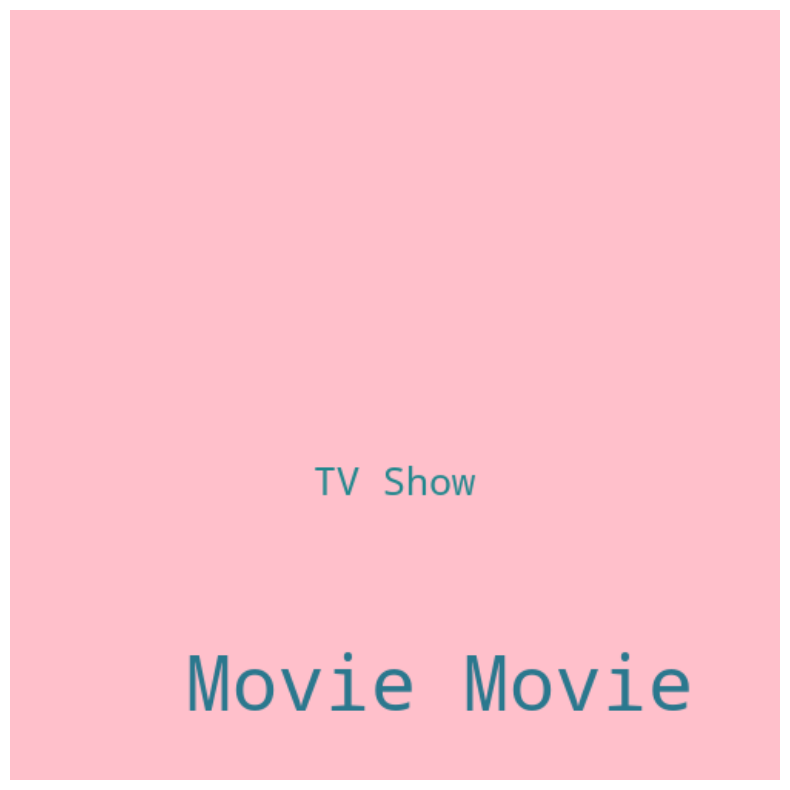

Looking for insights from title Movies/TV Shows


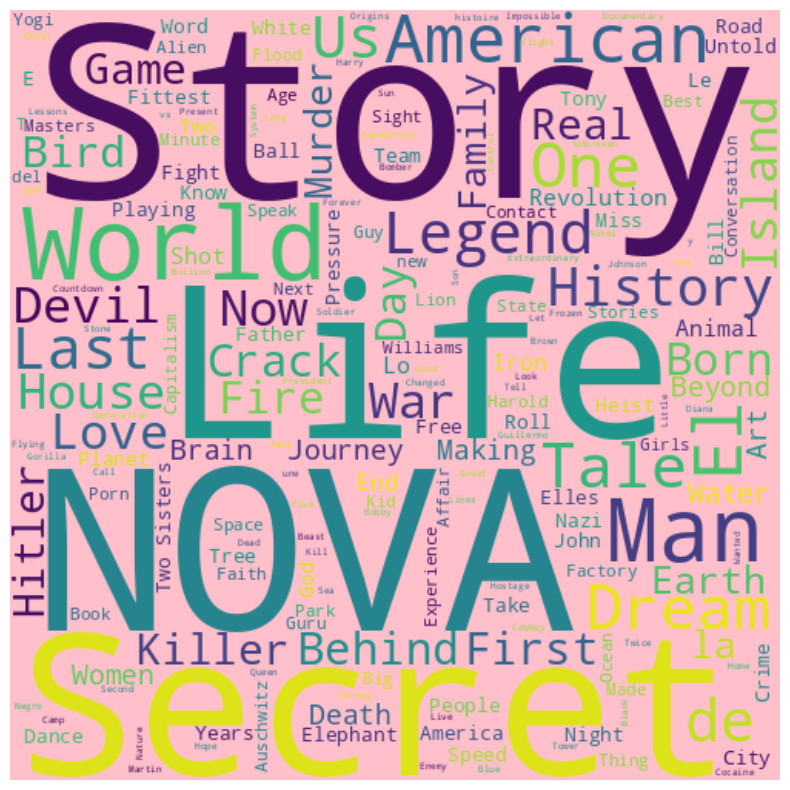

Looking for insights from country Movies/TV Shows


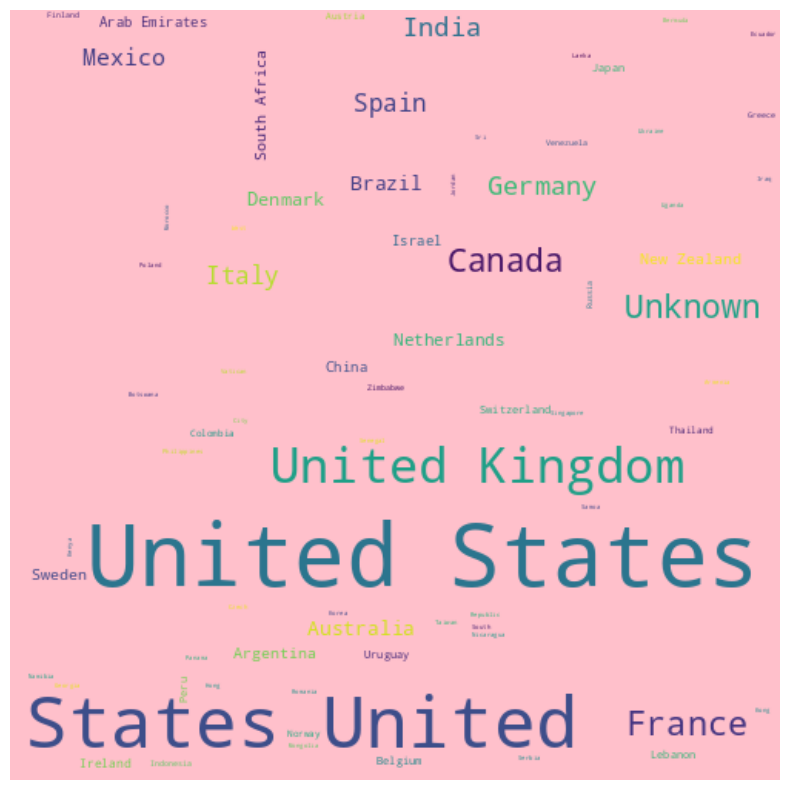

Looking for insights from rating Movies/TV Shows


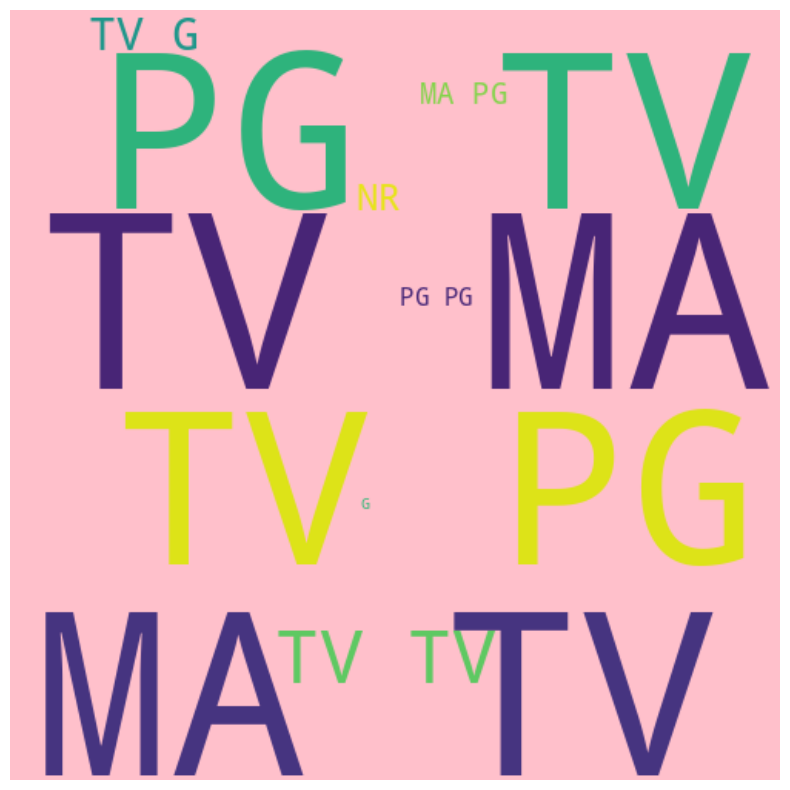

Looking for insights from listed_in Movies/TV Shows


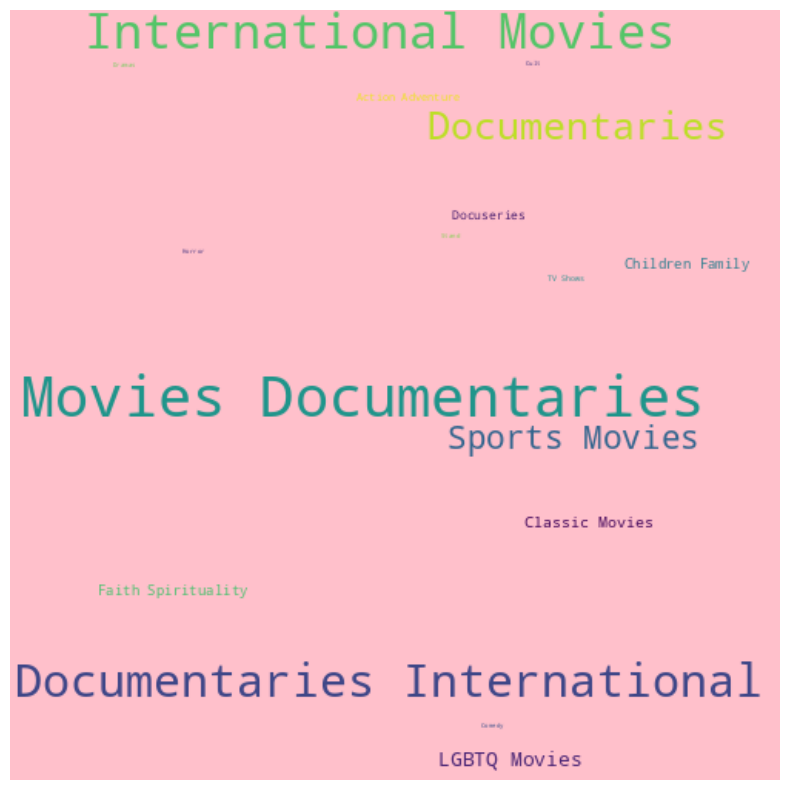

Looking for insights from description Movies/TV Shows


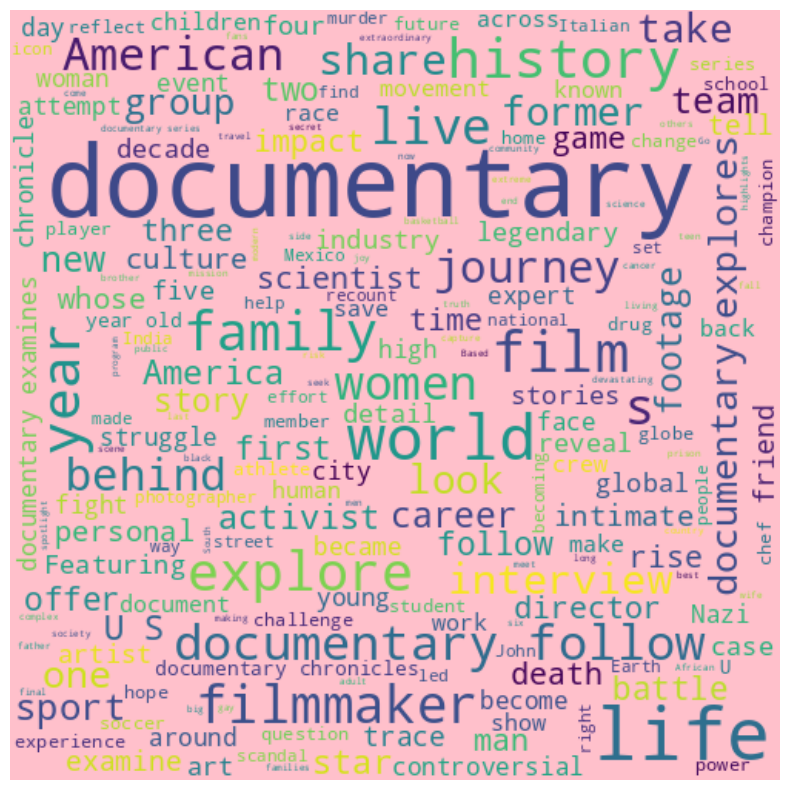

In [ ]:
word_count(9)

Cluster 9 in a dataset contains a total of 232 words. The most frequently occurring words in this cluster are as follows:

Type - Movie & Tv shows

Title - Broadway,Remastered,Christmas ,Friends Orchestra

Country- United Kingdom,Argentina,United States,India

Rating -TV-MA,PG-TV

Listed_in - Dramas International,Musical Dramas,Musicial Documentaries,Comedies International

Description- Documentary ,Music,One,Bad,Tour ,Love.

Exploring Cluster 11
Looking for insights from type Movies/TV Shows


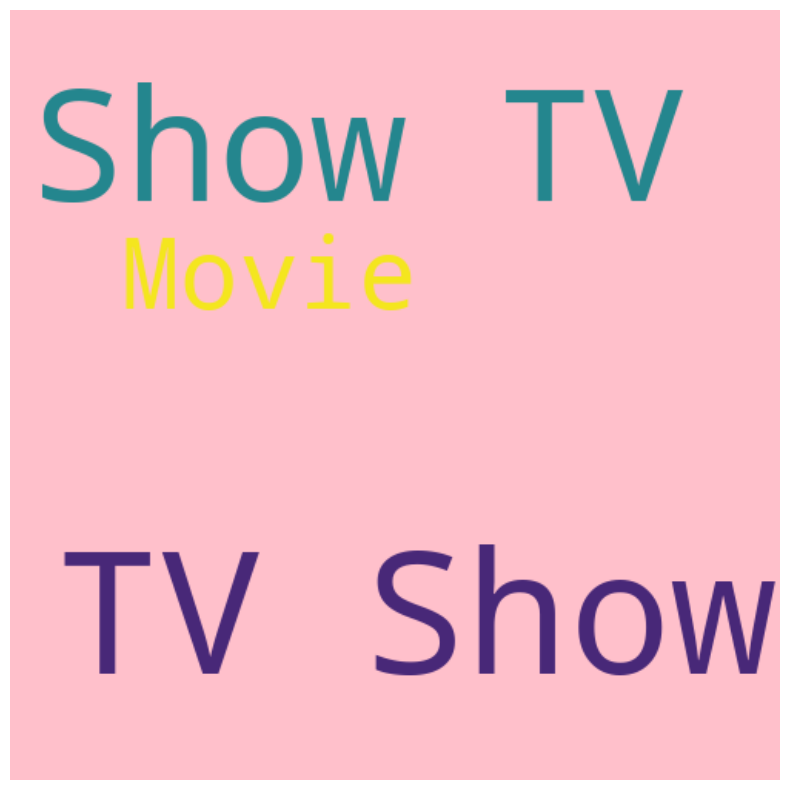

Looking for insights from title Movies/TV Shows


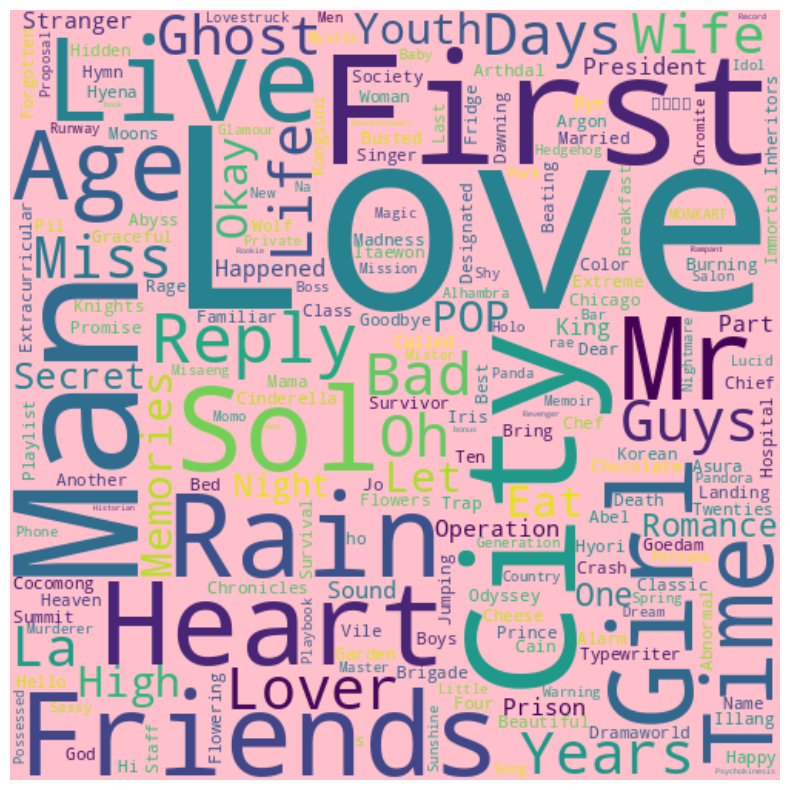

Looking for insights from country Movies/TV Shows


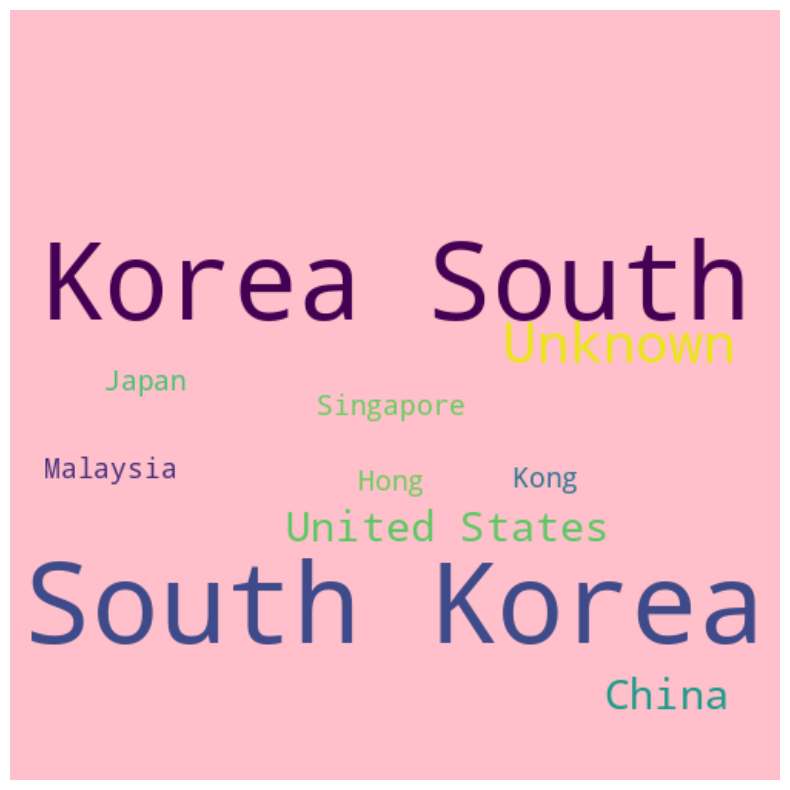

Looking for insights from rating Movies/TV Shows


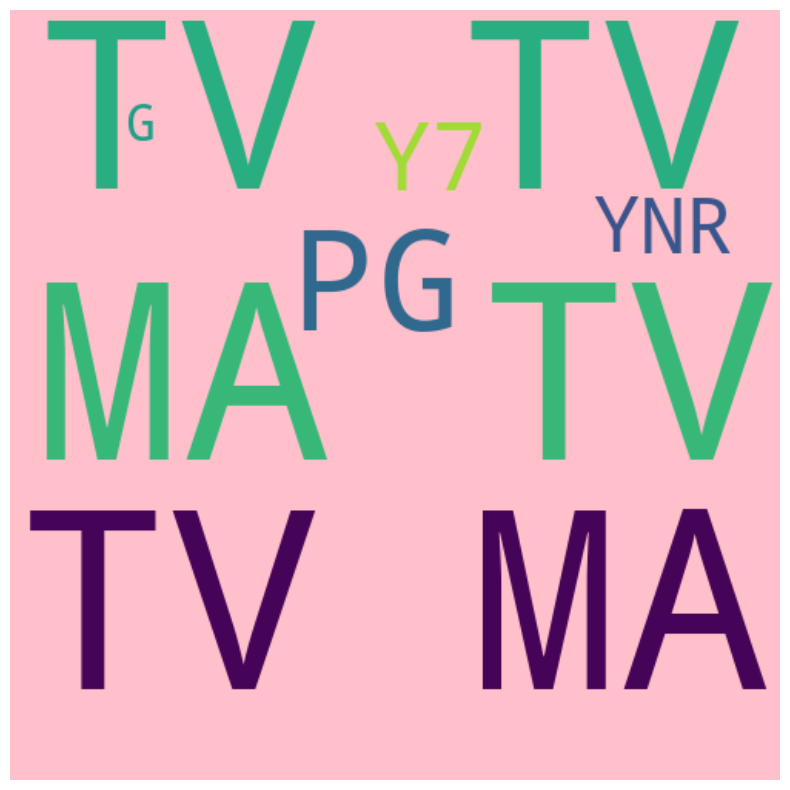

Looking for insights from listed_in Movies/TV Shows


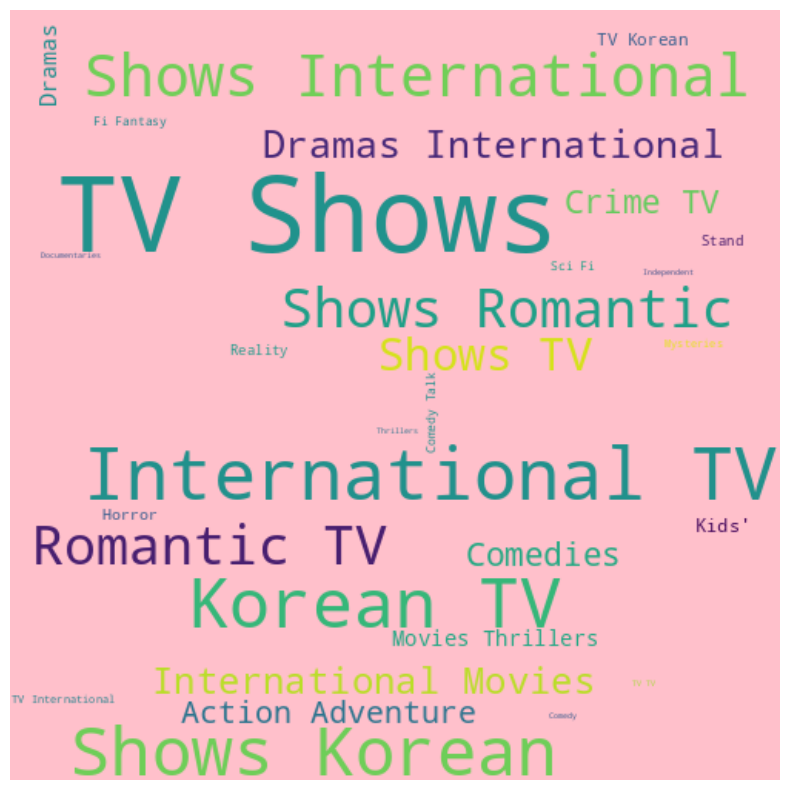

Looking for insights from description Movies/TV Shows


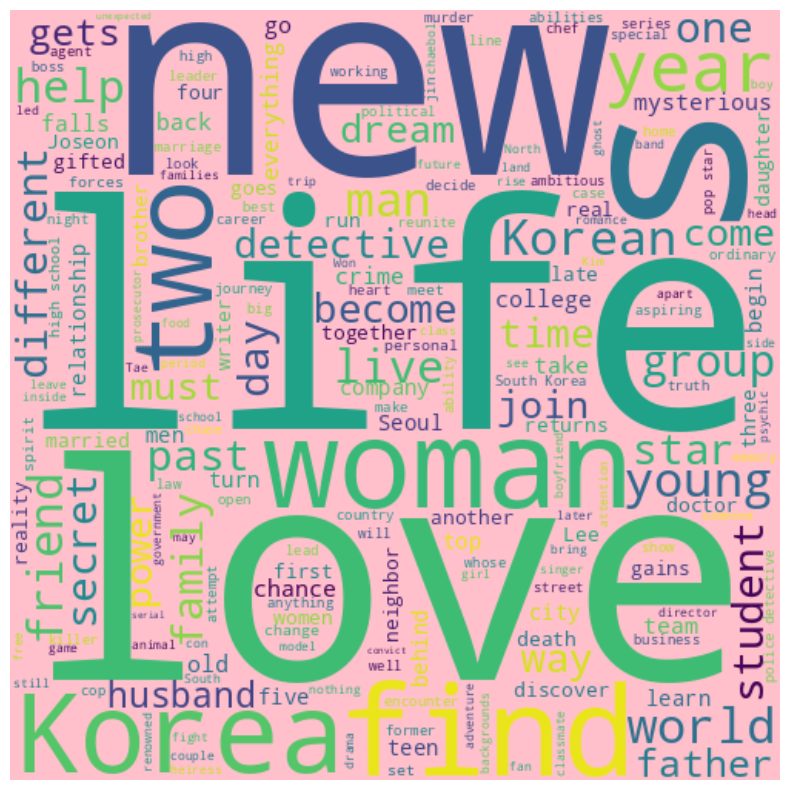

In [ ]:
word_count(11)

Cluster 11 in a dataset contains a total of 410 words. The most frequently occurring words in this cluster are as follows:

Type - Movie & Tv shows

Title - Special, America,Time,Live,Comedy, Netflix Alive, Martin

Country - United States,Brazil,Mexico,Italy

Rating -TV-MA,TV-PG

Listed_in - Tv-Comedies, Comedy Stand, Talk shows

Description- Stand Comedy, Comic, Take, Life, Live, Share,Stories.

## ***8.*** ***Future Work (Optional)***

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

1- It is interesting to note that the majority of the content available on Netflix consists of movies. However, in recent years, the platform has been focusing more on TV shows.

2- Most of these shows are released either at the end or the beginning of the year.

3- The United States and India are among the top five countries that produce all of the available content on the platform. Additionally, out of the top ten actors with the maximum content, six of them are from India.

4- When it comes to content ratings, TV-MA tops the charts, indicating that mature content is more popular on Netflix.

5- The value of k=15 was found to be optimal for clustering the data, and it was used to group the content into ten distinct clusters.

6- Using this data, a Content based recommender system was created using cosine similarity, which provided recommendations for Movies and TV shows.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***